In [454]:
import dataframes as RAW
import cleaning as CLEAN
import pandas as pd
import numpy as np
import ast

In [455]:
RAW.character_data.head()

,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [456]:
RAW.movie_data.head()

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."


In [457]:
RAW.summaries.head()

,Wiki ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [458]:
RAW.character_names.head()

,Character name,Freebase ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [459]:
RAW.tvtropes.head()

,Character type,Character name,Movie,Freebase ID,Actor name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


# Retirer les films qui n'ont pas de genre et contenir le dataframe dans un tableaz nommé "Clean_movie_data"

- Je compte également le nombre de fillms avant et après pour être sûr qu'on en a pas drop beaucoup

In [460]:
#Make copy 
cleaned_movie_data = RAW.movie_data.copy()

- Compter le nombre de films avant de supprimer les films qui n'ont pas de feature "Genres"

In [461]:
#Filtering-out genres which are NaN
print("La taille des données avant d'avoir dropé les films qui n'ont pas de genre")
print(len(cleaned_movie_data))





La taille des données avant d'avoir dropé les films qui n'ont pas de genre
39372


- Compter le nombre de films après avoir supprimé les films qui n'ont pas de feature "Genres"

In [462]:
cleaned_movie_data = cleaned_movie_data.dropna(subset=['Genres'])
print("La taille des données après  avoir dropé les films qui n'ont pas de genre")
print(len(cleaned_movie_data))

La taille des données après  avoir dropé les films qui n'ont pas de genre
39372


# Aucun film n a eu besoin d'être retiré

# Fonction pour ne prendre que les valeurs du disctionnaire des genre de films

- Les genres sont sous la forme {"clé1": "Genre1", "clé2": "GenreN",....,"cléN": "GenreN"}

- On va utiliser une fonction pour ne prendre que le genre et mettre sous la forme ["Genre1","Genre2",...,"Genren"]



In [463]:
#Only keeps the values of the dictionaries
def extract_genres(genre_str):
    try:
        genre_dict = ast.literal_eval(genre_str)
        return list(genre_dict.values())
    except (ValueError, SyntaxError) as e:
        print(f"Error converting string to dictionary. Error: {e}")
        return []

On l'applique à notre **clean_movie_data**

- On va utiliser cette fonction dans toutes les **colonnes Genres** pour passer de la forme {"clé1": "Genre1", "clé2": "GenreN",....,"cléN": "GenreN"} à ["Genre1","Genre2",...,"GenreN"]

In [464]:
#Apply the cleaning function to data. Generates the new "Genres" column
Cleaned_genres = cleaned_movie_data['Genres'].apply(extract_genres)

- **Cleaned_genres** est notre colonne contentant tous les genres de toutes les data avec une liste à la place d'un dictionnaire 

- On **change** la colonne **"Genres"** de notre cleaned_movie_data **par** la colonne **Cleaned_genres** qu'on vient de créer

In [465]:
Cleaned_genres

#Inject the new "Genres" in
#Movie data without NaN and with cleaned up Genres
cleaned_movie_data["Genres"] = Cleaned_genres

- On compte à nouveau notre nombre de lignes pour voir si des données ont étaient perdus pendant cette opération 

In [466]:
cleaned_movie_data

len(cleaned_movie_data)

39372

Le compte est toujours le même

-
-
-
-
-
-
-
-
-
-
-
-

# <center>Début du code pour compter les films et genre par décennie </center>


# Ce code effectue une opération de filtrage sur le DataFrame cleaned_movie_data. Voici ce que fait chaque ligne :

- cleaned_movie_data["Wiki ID"].isin(RAW.character_data["Wiki ID"]): Cette expression crée un masque booléen, indiquant pour chaque ligne de cleaned_movie_data si la valeur dans la colonne "Wiki ID" est présente dans la colonne "Wiki ID" du DataFrame RAW.character_data. Le résultat est une série de valeurs booléennes.

- cleaned_movie_data[cleaned_movie_data["Wiki ID"].isin(RAW.character_data["Wiki ID"])]: Cette ligne utilise le masque booléen pour filtrer les lignes de cleaned_movie_data pour lesquelles la condition est vraie. Ainsi, le DataFrame résultant, result_cleaned_movie_data, contiendra uniquement les lignes où les valeurs dans la colonne "Wiki ID" de cleaned_movie_data sont également présentes dans la colonne "Wiki ID" de RAW.character_data. Cela permet de s'assurer que seuls les films avec des acteurs présents dans les données sur les personnages (RAW.character_data) sont conservés.

In [480]:

#Makes sure to only keep movies with actors in our character metadata
#common_wiki_ids = cleaned_movie_data[cleaned_movie_data["Wiki ID"].isin(RAW.character_data["Wiki ID"])]
print(len(cleaned_movie_data))
result_cleaned_movie_data = cleaned_movie_data[cleaned_movie_data["Wiki ID"].isin(RAW.character_data["Wiki ID"])]
print(len(result_cleaned_movie_data))

39372
34050


In [481]:
#Counts the numbers of appearance of each genre in all movies
exploded_genres = result_cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()

genre_counts

Genres
Drama                   16150
Comedy                   8948
Romance Film             5543
Black-and-white          5070
Thriller                 4834
                        ...  
Prison escape               1
Chick flick                 1
Race movie                  1
Breakdance                  1
Hardcore pornography        1
Name: count, Length: 346, dtype: int64

In [483]:
# Set your threshold value
threshold = 2000  

# Filter out genres below the threshold
filtered_genres = genre_counts[genre_counts >= threshold].index.tolist()

# Creates filter for the original DataFrame based on the threshold
filtered_genres = result_cleaned_movie_data.apply(lambda row: [genre for genre in row['Genres'] if genre in filtered_genres], axis=1)


In [484]:
#Inject the modified "Genres" in
result_cleaned_movie_data["Genres"] = filtered_genres

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1552177804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cleaned_movie_data["Genres"] = filtered_genres


In [485]:
#Counts the counts for each genre in all movies after threshold filter
exploded_genres = result_cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()
genre_counts

Genres
Drama               16150
Comedy               8948
Romance Film         5543
Black-and-white      5070
Thriller             4834
Action               4598
Indie                3847
Crime Fiction        3562
Short Film           3178
Silent film          3155
World cinema         3104
Adventure            2715
Family Film          2530
Action/Adventure     2520
Horror               2328
Name: count, dtype: int64

In [486]:
#List of genres after threshold filtering
unique_genres_list = genre_counts.index.tolist()
unique_genres_list

['Drama',
 'Comedy',
 'Romance Film',
 'Black-and-white',
 'Thriller',
 'Action',
 'Indie',
 'Crime Fiction',
 'Short Film',
 'Silent film',
 'World cinema',
 'Adventure',
 'Family Film',
 'Action/Adventure',
 'Horror']

34050

# Regarder le nombre de films qui ont les données des characters data

-On a print avant le nombre de films qui vaut 39'372 

In [118]:
result_cleaned_movie_data

print(len(result_cleaned_movie_data))



34050


- Après avoir mis en lien les ID des films et les ID des films dans le dataframe des characters, on a perdu 5'322 films 

# Bonus

- Ali veut des subplot avec les genres et et les revenus en fonction des runtime

In [562]:
result_cleaned_movie_data_runtime = result_cleaned_movie_data.copy() #Dataframe pour avoir les runtime




#Droper les valeurs NaN pour les revenues
result_cleaned_movie_data_runtime = result_cleaned_movie_data_runtime.dropna(subset=['Revenue'])

# Réindexer le DataFrame après la suppression des lignes
result_cleaned_movie_data_runtime = result_cleaned_movie_data_runtime.reset_index(drop=True)

#Droper les valeurs NaN pour les runtime
result_cleaned_movie_data_runtime = result_cleaned_movie_data_runtime .dropna(subset=['Runtime'])

# Réindexer le DataFrame après la suppression des lignes
result_cleaned_movie_data_runtime  = result_cleaned_movie_data_runtime .reset_index(drop=True)

#Droper les valeurs NaN pour les runtime
result_cleaned_movie_data_runtime = result_cleaned_movie_data_runtime .dropna(subset=['Genres'])

# Réindexer le DataFrame après la suppression des lignes
result_cleaned_movie_data_runtime  = result_cleaned_movie_data_runtime .reset_index(drop=True)

#On explose pour avoir les genres uniques
result_cleaned_movie_data_runtime = result_cleaned_movie_data_runtime.explode('Genres')


result_cleaned_movie_data_runtime










,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Thriller
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Horror
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Adventure
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Action
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Comedy
...,...,...,...,...,...,...,...,...,...
6616,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Drama
6616,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Comedy
6616,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Romance Film
6617,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...",Comedy


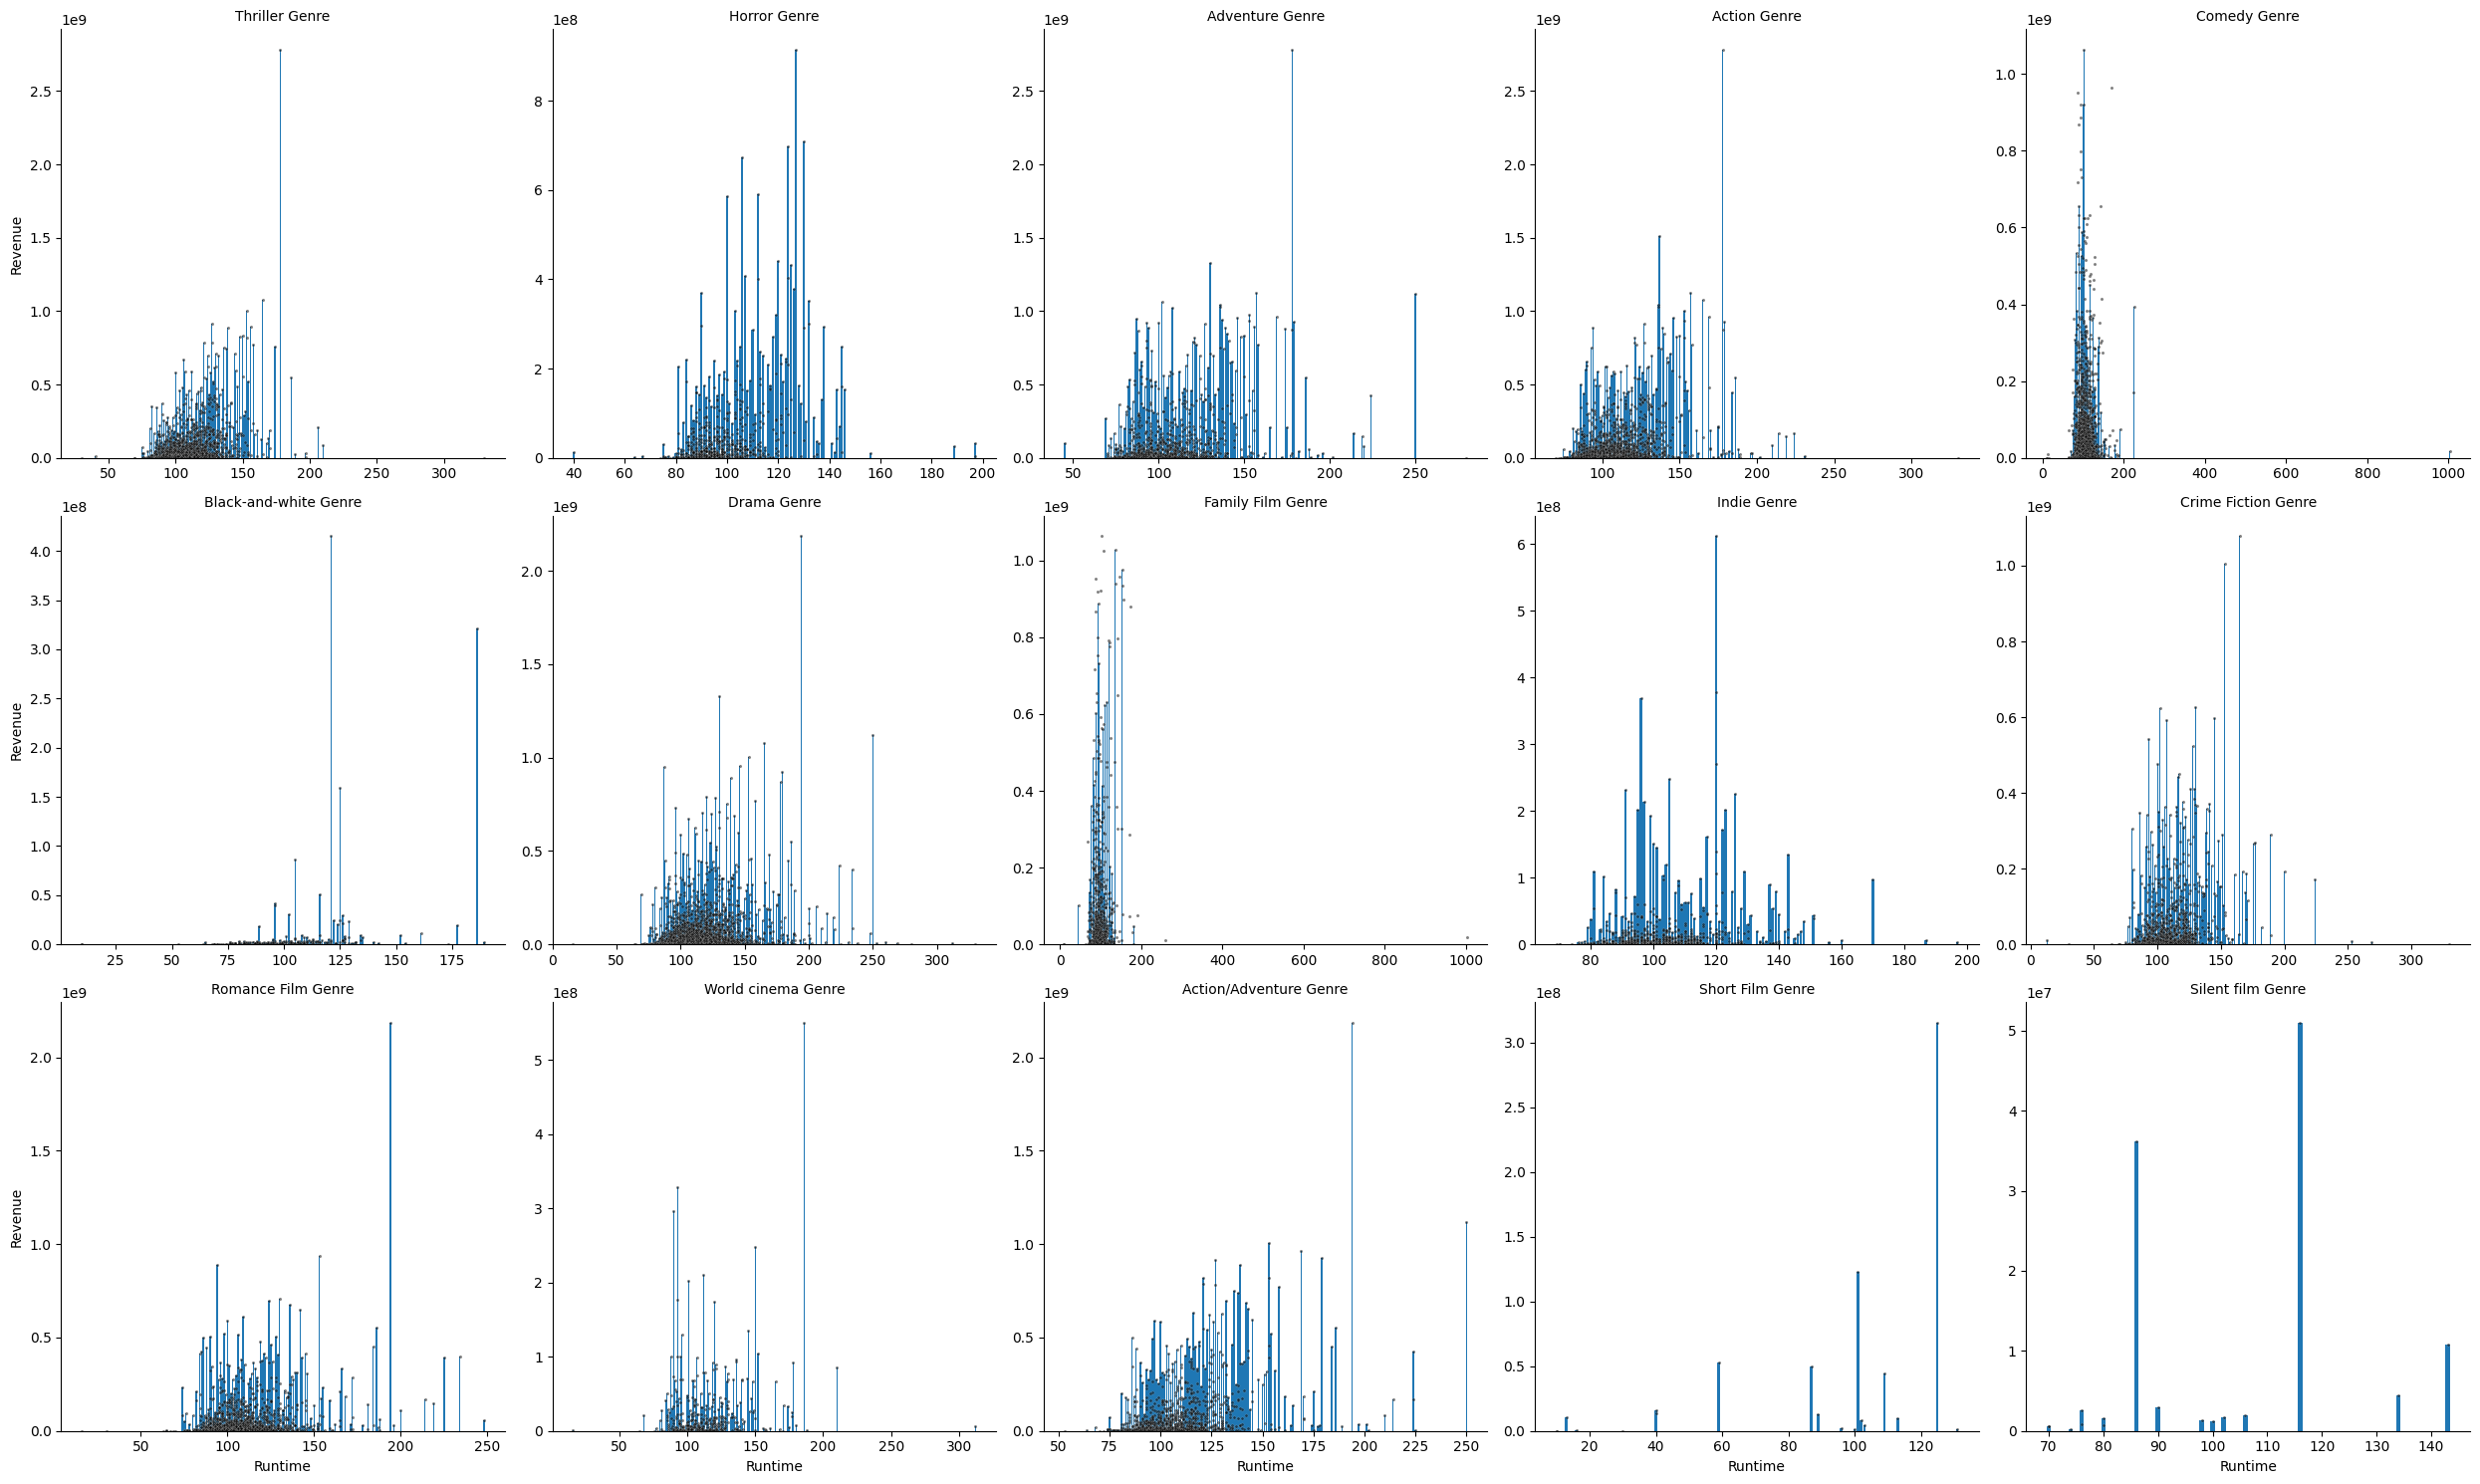

In [564]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle result_cleaned_movie_data_runtime
# Assurez-vous d'avoir les colonnes 'Revenue', 'Runtime' et 'Genres' dans votre DataFrame

# Créer une grille de sous-graphiques avec seaborn
g = sns.FacetGrid(result_cleaned_movie_data_runtime, col='Genres', col_wrap=5, height=5, sharex=False, sharey=False)

# Ajouter des graphiques à barres sur chaque sous-graphique
g.map(plt.bar, 'Runtime', 'Revenue')

# Ajouter une grille avec des points
g.map_dataframe(sns.scatterplot, 'Runtime', 'Revenue', color='black', s=5, alpha=0.5)

# Ajouter des étiquettes et des titres
g.set_axis_labels('Runtime', 'Revenue')
g.set_titles('{col_name} Genre')

# Ajuster l'espace entre les sous-graphiques
g.tight_layout()

# Afficher le graphique
plt.show()


# Rajouter une colonne qui indique l'année de sortie du film

- Ici on va utiliser **result_cleaned_movie_data** pour être sûr de **regarder nos datas** qui auront le même nombre de ID en commun avec le dataframe "character"

- D'abord j'en fais une copie que j'appelle result_cleaned_movie_data_year

- je m'assure de convertir la colonne 'release_date' en datetime si ce n'est pas déjà fait

- Je crée une colonne "Year" à **result_cleaned_movie_data** que j'appelle 'year' avec **result_cleaned_movie_data_year['Release date'].dt.year**

- Chaque film a désormais une année assignée extraite depuis sa release date

In [489]:
result_cleaned_movie_data_year = result_cleaned_movie_data.copy()

# Convertir la colonne 'release_date' en datetime si ce n'est pas déjà fait
result_cleaned_movie_data_year['Release date'] = pd.to_datetime(result_cleaned_movie_data_year['Release date'], errors='coerce')

# Extraire l'année de la colonne 'release_date'
result_cleaned_movie_data_year['year'] = result_cleaned_movie_data_year['Release date'].dt.year

result_cleaned_movie_data_year


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Horror, Adventure, Action]",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",[Drama],2000
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","[Short Film, Silent film, Indie, Black-and-whi...",1913
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Comedy, Black-and-white]",1938
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Drama, Comedy, Romance Film]",1997
...,...,...,...,...,...,...,...,...,...,...
81732,26482675,/m/0bbwngb,Eşrefpaşalılar,2010-03-05,1847671.0,NaN,{},{},[Drama],2010
81733,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Crime Fiction, Thriller, Comedy]",1941
81735,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","[Crime Fiction, Action, Drama]",2007
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",[Comedy],1972


# Regarder la date la plus vieille et la date la plus récente pour définir les intervalles de nos décennies

In [492]:
# Supposons que votre DataFrame a une colonne 'Date'
# Remplacez 'NomDeVotreDataFrame' et 'NomDeVotreColonneDate' par les noms appropriés

date_min = result_cleaned_movie_data_year['Release date'].min()
date_max = result_cleaned_movie_data_year['Release date'].max()

print(f"Date la plus ancienne : {date_min}")
print(f"Date la plus récente : {date_max}")

# Supposons que votre DataFrame a une colonne 'Date'
# Remplacez 'NomDeVotreDataFrame' et 'NomDeVotreColonneDate' par les noms appropriés

deuxieme_date_plus_ancienne = result_cleaned_movie_data_year['Release date'].nsmallest(2).iloc[1]

print(f"Deuxième date la plus ancienne : {deuxieme_date_plus_ancienne}")

# Filtrer les données pour inclure uniquement celles antérieures à l'année 1900
donnees_avant_1900 = result_cleaned_movie_data_year[result_cleaned_movie_data_year['Release date'].dt.year < 1900]

# Afficher les données avant 1900
print(len(donnees_avant_1900))

donnees_avant_1920 = result_cleaned_movie_data_year[result_cleaned_movie_data_year['Release date'].dt.year < 1920]
donnees_avant_1910 = result_cleaned_movie_data_year[result_cleaned_movie_data_year['Release date'].dt.year < 1910]
print(len(donnees_avant_1920))
print(len(donnees_avant_1910))



Date la plus ancienne : 1894-11-17 00:00:00
Date la plus récente : 2016-06-08 00:00:00
Deuxième date la plus ancienne : 1895-08-28 00:00:00
4
1875
63


# Regarder le nombre de films de avant 1900 à 2010 et après

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1356036178.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Decade', y='Number of Films', data=films_tous_les_dix_ans_df , palette=palette_couleurs)


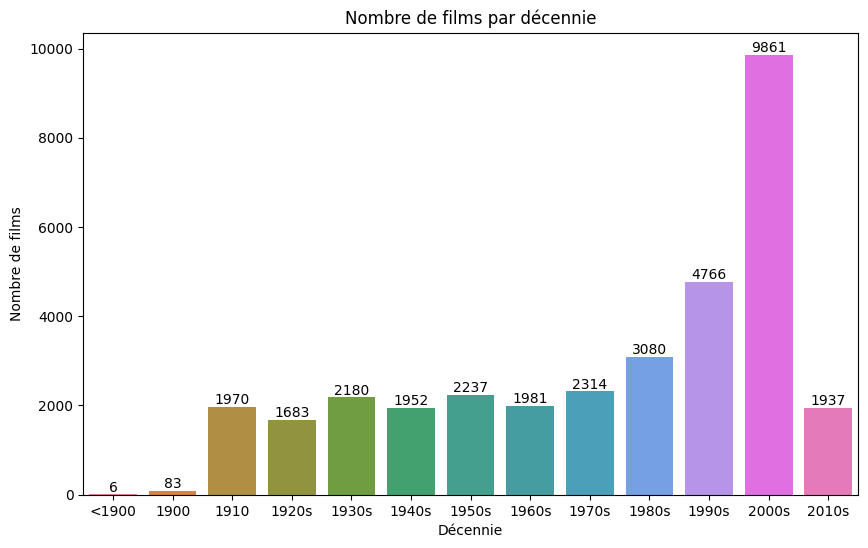

In [538]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que vous avez déjà extrait la date de sortie dans une colonne 'Release date'
# Remplacez 'NomDeVotreDataFrame' et 'Release date' par les noms appropriés

# Convertir la colonne 'Release date' en format de date si elle n'est pas déjà au format datetime
result_cleaned_movie_data_year['Release date'] = pd.to_datetime(result_cleaned_movie_data_year['Release date'], errors='coerce')

bins = [min(result_cleaned_movie_data_year['year'])-1,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010, max(result_cleaned_movie_data_year['year'])+1] #intervalles de dix ans
labels = ['<1900','1900','1910','1920s','1930s','1940s','1950s','1960s', '1970s','1980s','1990s', '2000s', '2010s']#nommer ces intervalles

nombre_de_films_tous_les_dix_ans = result_cleaned_movie_data_year.copy()

nombre_de_films_tous_les_dix_ans['Decade'] = pd.cut(nombre_de_films_tous_les_dix_ans ['year'], bins=bins, labels=labels)

films_tous_les_dix_ans = nombre_de_films_tous_les_dix_ans['Decade'].value_counts().sort_index().reset_index()

films_tous_les_dix_ans.columns = ['Decade', 'Number of Films']


# Compter le nombre de films par décennie
films_par_decennie = result_cleaned_movie_data_year['Decade'].value_counts().sort_index().reset_index()


# Convertir en DataFrame
films_tous_les_dix_ans_df = pd.DataFrame(films_tous_les_dix_ans)

# Choisir une palette de couleurs pour les décennies
palette_couleurs = sns.color_palette("husl", n_colors=len(films_tous_les_dix_ans_df))

# Créer un barplot avec seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Decade', y='Number of Films', data=films_tous_les_dix_ans_df , palette=palette_couleurs)
for i in ax.containers:
        
        ax.bar_label(i,)
# Ajouter des titres et des labels
plt.title('Nombre de films par décennie')
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')

# Afficher le graphique
plt.show()


In [494]:
# Supposons que votre DataFrame a une colonne 'Date' contenant les années
# Remplacez 'NomDeVotreDataFrame' et 'NomDeVotreColonneDate' par les noms appropriés




# Compter le nombre de films par année
nombre_de_films_par_annee = result_cleaned_movie_data_year['year'].value_counts().sort_index()

# Afficher le nombre de films par année
print(nombre_de_films_par_annee)


year
1894       1
1895       1
1896       1
1897       1
1900       2
        ... 
2011    1144
2012     710
2013      77
2014       5
2016       1
Name: count, Length: 120, dtype: int64


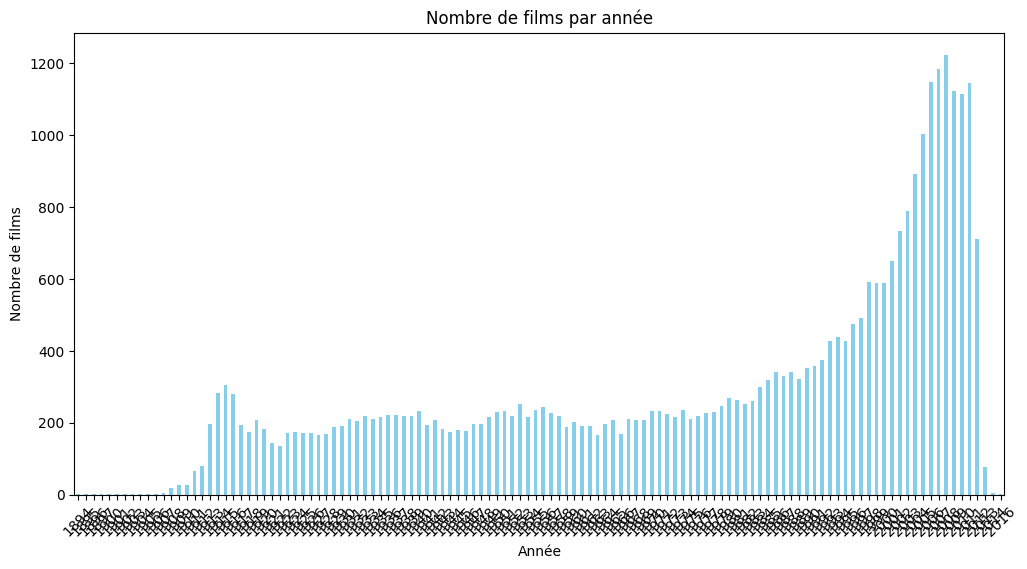

In [495]:
import matplotlib.pyplot as plt
import pandas as pd



# Créer un barplot
plt.figure(figsize=(12, 6))
nombre_de_films_par_annee.plot(kind='bar', color='skyblue')
plt.title('Nombre de films par année')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.xticks(rotation=45)
plt.show()


# Réunion des films par décennie

- On ajoute une colonne Decade qui spécifie la décennie du film ( ca va de avant 1920s suivi de 1920s 1930s .... 2010s)

- Les bins sont les bornes de chaque intervalle de décennie 

- Les labels sont les noms de nos intervalles 

- L'intervalle de dix ans après 1920 a été choisi car peu de données avant 1920 donc on peut les regrouper

- Avec la fonction pd.cut on peut découper par tranches de décennies et appliquer le label de la décennie correspondante pour chaque film 

- On crée donc une colonne avec la décennie correspondante 

In [496]:
#On réunit les films par décennies 


bins = [min(result_cleaned_movie_data_year['year'])-1,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010, max(result_cleaned_movie_data_year['year'])+1]
labels = ['<1920','1920s','1930s','1940s','1950s','1960s', '1970s','1980s','1990s', '2000s', '2010s']
result_cleaned_movie_data_year['Decade'] = pd.cut(result_cleaned_movie_data_year['year'], bins=bins, labels=labels)

result_cleaned_movie_data_year








,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Horror, Adventure, Action]",2001,2000s
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",[Drama],2000,1990s
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","[Short Film, Silent film, Indie, Black-and-whi...",1913,<1920
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Comedy, Black-and-white]",1938,1930s
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Drama, Comedy, Romance Film]",1997,1990s
...,...,...,...,...,...,...,...,...,...,...,...
81732,26482675,/m/0bbwngb,Eşrefpaşalılar,2010-03-05,1847671.0,NaN,{},{},[Drama],2010,2000s
81733,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Crime Fiction, Thriller, Comedy]",1941,1940s
81735,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","[Crime Fiction, Action, Drama]",2007,2000s
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",[Comedy],1972,1970s


# Compter le nombre de films par décennie en créant un tableau "flims_par_décennie"

- Vérifier que le nombre total de film est bien égale à notre nombre de films initial contenu dans la dataframe result_cleaned_movie_data_year

In [497]:
# Compter le nombre de films par décennie
films_par_decennie = result_cleaned_movie_data_year['Decade'].value_counts().sort_index()

films_par_decennie

Decade
<1920    2059
1920s    1683
1930s    2180
1940s    1952
1950s    2237
1960s    1981
1970s    2314
1980s    3080
1990s    4766
2000s    9861
2010s    1937
Name: count, dtype: int64

# Compter le nombre de films par décennie 

In [498]:
# Compter le nombre total contenu dans le tableau "films_par_decennie"
films_par_decennie.sum()



34050

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1491241116.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Decade', y='Number of Films', data=films_par_decennie_df, palette=palette_couleurs)


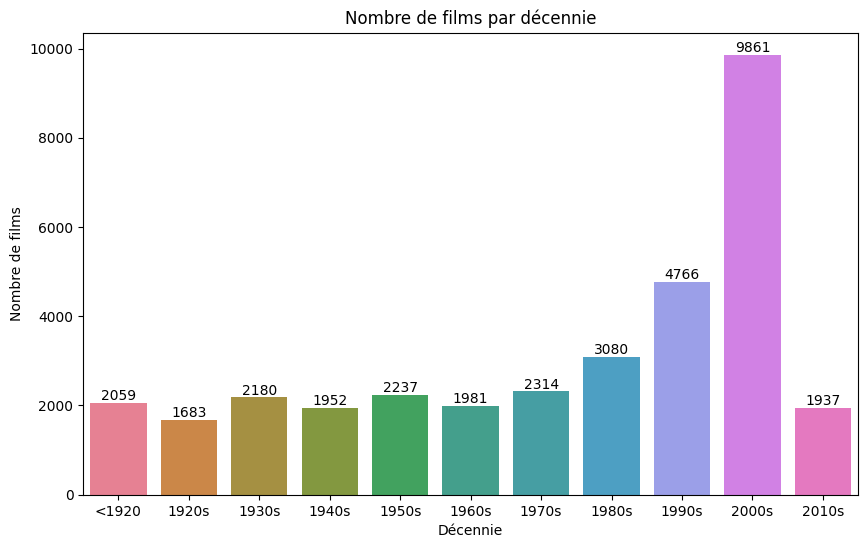

In [499]:
# Compter le nombre de films par décennie
films_par_decennie = result_cleaned_movie_data_year['Decade'].value_counts().sort_index().reset_index()
films_par_decennie.columns = ['Decade', 'Number of Films']

# Convertir en DataFrame
films_par_decennie_df = pd.DataFrame(films_par_decennie)

# Choisir une palette de couleurs pour les décennies
palette_couleurs = sns.color_palette("husl", n_colors=len(films_par_decennie_df))

# Créer un barplot avec seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Decade', y='Number of Films', data=films_par_decennie_df, palette=palette_couleurs)
for i in ax.containers:
        
        ax.bar_label(i,)
# Ajouter des titres et des labels
plt.title('Nombre de films par décennie')
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')

# Afficher le graphique
plt.show()

# Regarder les genres par décennie

-Ici, au lieu d'avoir une liste pour chaque film avec les genres ligne 1 : film1 [genre1,genre2,genre3] decade1

-On va "explode" notre data frame de sorte à ce que la forme de notre tableau soit du style 
-                         Nom du film0 revenue0  genre 1 decade0
-                         Nom du film0 revenue0  genre 2 decade0 
-                         Nom du film0 revenue0  genre 3 decade0
-                         Nom du film0 revenue0  genre 4 decade0 
-                         Nom du film1 revenue1  genre 1 decade1 
-                         Nom du film1 revenue1  genre 2 decade1
-                         Nom du film1 revenue1  genre 3 decade1

In [500]:
result_cleaned_movie_data_year_genres = result_cleaned_movie_data_year.explode('Genres')

result_cleaned_movie_data_year_genres

#Ici on a le tableau avec Nom du film0 revenue0  genre 1 decade0
#                         Nom du film0 revenue0  genre 2 decade0 
#                         Nom du film0 revenue0  genre 3 decade0
#                         Nom du film0 revenue0  genre 4 decade0 
#                         Nom du film1 revenue1  genre 1 decade1 
#                         Nom du film1 revenue1  genre 2 decade1
#                         Nom du film1 revenue1  genre 3 decade1
# 
# 
#  


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Thriller,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Horror,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Adventure,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Action,2001,2000s
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Drama,2000,1990s
...,...,...,...,...,...,...,...,...,...,...,...
81735,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}",Drama,2007,2000s
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Comedy,1972,1970s
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Adventure,1992,1990s
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Short Film,1992,1990s


- Imprimer le nombre de lignes avant de supprimer les lignes identiques 

In [501]:
print(len(result_cleaned_movie_data_year_genres))

74970


- On vérifie à nouveau qu'il y a bien toujours 34'050 films en comptant le nombre de WIKI ID unique

In [502]:
# Compter le nombre de valeurs uniques dans la colonne "Wiki ID"
nombre_unique_wiki_id = result_cleaned_movie_data_year_genres['Wiki ID'].nunique()

# Afficher le résultat
print("Nombre de valeurs uniques dans la colonne 'Wiki ID' :", nombre_unique_wiki_id)

Nombre de valeurs uniques dans la colonne 'Wiki ID' : 34050


- On compare néanmoins le nombre de ligne identiques 

- Peut être qu'un genre était compris deux fois dans une liste 

In [503]:
# Compter le nombre de lignes identiques
nombre_lignes_identiques = result_cleaned_movie_data_year_genres.duplicated().sum()

# Afficher le résultat
print("Nombre de lignes identiques dans le DataFrame :", nombre_lignes_identiques)


Nombre de lignes identiques dans le DataFrame : 0


-On a bien une ligne en double, il s'agit de regarder de quel film il 'sagit

In [504]:

# Vérifier les doublons
doublons_genres = result_cleaned_movie_data_year_genres[result_cleaned_movie_data_year_genres.duplicated(subset=['Wiki ID', 'Genres'], keep=False)]

# Afficher les lignes avec des doublons
print("Lignes avec des doublons de genres pour le même film :")
print(doublons_genres[['Wiki ID', 'Genres']])

doublons_genres

Lignes avec des doublons de genres pour le même film :
Empty DataFrame
Columns: [Wiki ID, Genres]
Index: []


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade


In [505]:
#Compter le nombre de ligne avant la suppression du doublon

print(len(result_cleaned_movie_data_year_genres))

74970


# Supprimer la ligne en double 


In [506]:
# Supprimer les lignes en double basées sur les colonnes 'Wiki ID' et 'Genres'
result_cleaned_movie_data_year_genres = result_cleaned_movie_data_year_genres.drop_duplicates(subset=['Wiki ID', 'Genres'], keep='first')

# Afficher le DataFrame après la suppression des doublons
print(result_cleaned_movie_data_year_genres)


        Wiki ID Freebase ID  \
0        975900   /m/03vyhn   
0        975900   /m/03vyhn   
0        975900   /m/03vyhn   
0        975900   /m/03vyhn   
1       3196793   /m/08yl5d   
...         ...         ...   
81735  32468537  /m/0crwd9y   
81738   9971909  /m/02pygw1   
81739    913762   /m/03pcrp   
81739    913762   /m/03pcrp   
81739    913762   /m/03pcrp   

                                              Movie name Release date  \
0                                         Ghosts of Mars   2001-08-24   
0                                         Ghosts of Mars   2001-08-24   
0                                         Ghosts of Mars   2001-08-24   
0                                         Ghosts of Mars   2001-08-24   
1      Getting Away with Murder: The JonBenét Ramsey ...   2000-02-16   
...                                                  ...          ...   
81735                                    Shadow Boxing 2   2007-10-18   
81738                                  Anot

- Compter le nombre de lignes après la suppression de la ligne en double

In [507]:
#Compter le nombre de ligne avant la suppression du doublon

print(len(result_cleaned_movie_data_year_genres))

74970


# Regarder les genres les plus fréquents par décennie 

- Création d'un tableau genre_by_decade qui regroupe par décénnie et par genre le nombre de films, en ligne la décennie et en colonne le genre de films et dans les cases les nombre de films qui appartiennent à cette décennie et ce genre de film

In [508]:
# Analyser les genres les plus fréquents par décennie

genres_by_decade = result_cleaned_movie_data_year_genres.groupby(['Decade', 'Genres']).size().unstack(fill_value=0)

genres_by_decade




C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2441090226.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genres_by_decade = result_cleaned_movie_data_year_genres.groupby(['Decade', 'Genres']).size().unstack(fill_value=0)


Genres,Action,Action/Adventure,Adventure,Black-and-white,Comedy,Crime Fiction,Drama,Family Film,Horror,Indie,Romance Film,Short Film,Silent film,Thriller,World cinema
Decade,,,,,,,,,,,,,,,
<1920,31,3,60,1607,650,28,819,1,13,1205,82,1322,1923,10,9
1920s,86,13,112,879,351,80,624,34,25,499,217,282,1211,21,24
1930s,196,113,172,1089,652,239,906,194,52,9,394,373,8,126,15
1940s,147,100,152,756,503,260,817,182,53,4,303,251,1,233,29
1950s,191,147,220,505,507,226,1043,225,87,14,330,227,0,180,94
1960s,209,152,209,173,524,206,886,157,115,40,256,96,0,194,180
1970s,376,256,208,15,470,281,1173,165,213,93,248,30,1,360,220
1980s,616,319,316,10,845,381,1534,260,278,279,509,40,1,516,225
1990s,815,446,387,16,1388,652,2474,452,290,490,957,95,0,910,486


# <center> Heatmap des fréquences de genre par decade 

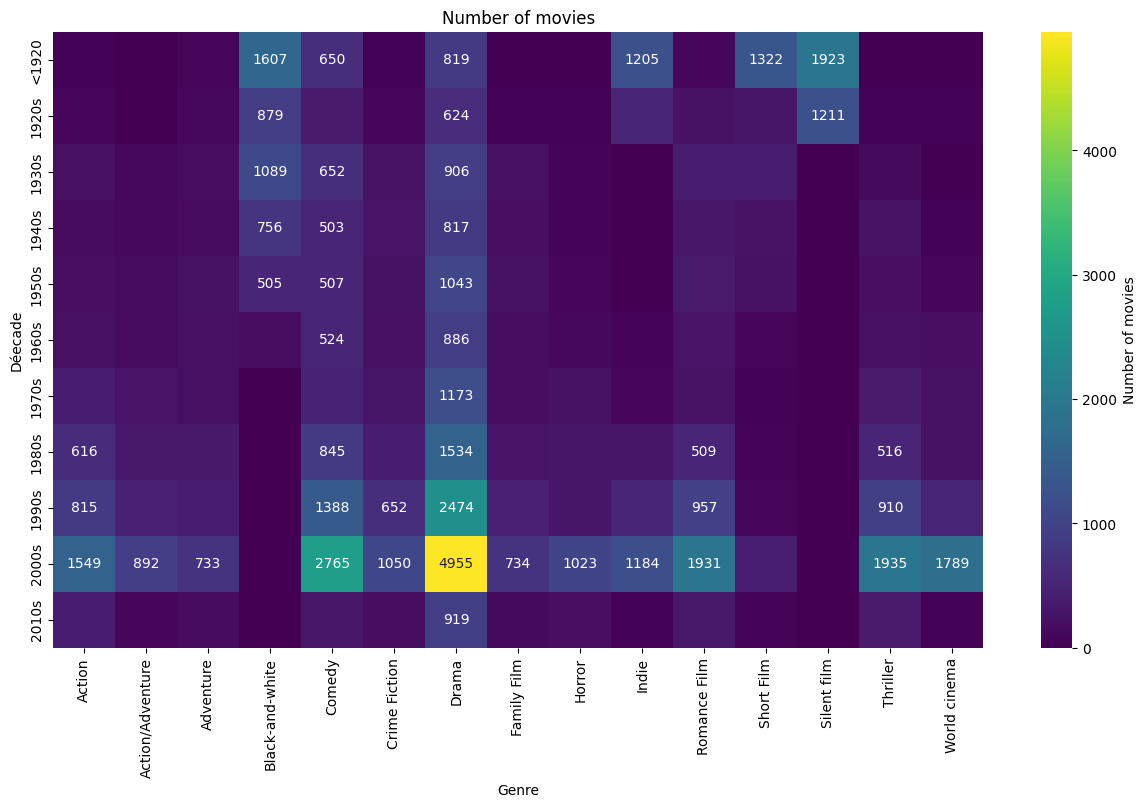

In [530]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que le DataFrame 'df' contient vos données

# Définir la taille du graphique
plt.figure(figsize=(15, 8))

# Créer une heatmap avec Seaborn
heatmap = sns.heatmap(genres_by_decade,annot = True, fmt=".0f", cmap='viridis', cbar_kws={'label': 'Number of movies'})

# Ajouter des titres et des labels
plt.title('Number of movies')
plt.xlabel('Genre')
plt.ylabel('Déecade')

# Masquer les annotations pour les valeurs inférieures à 1000
for text in heatmap.texts:
    if float(text.get_text().replace(",", "")) < 500:
        text.set_text("")

# Afficher le graphique
plt.show()


- Vérifier qu'il n'y a pas deux fois la même colonne avec le même genre 

In [518]:
genres_by_decade.columns

# Vérifier les doublons dans la liste des colonnes
doublons_genres = genres_by_decade.columns[genres_by_decade.columns.duplicated(keep=False)]
doublons_genres
# Afficher les genres en double
print("Genres en double :")
print(doublons_genres)




Genres en double :
Index([], dtype='object', name='Genres')


In [519]:


# Extraire les éléments de la liste contenant le terme "Action"
genres_action = [genre for genre in genres_by_decade.columns if 'Action' in genre]

# Afficher le nombre d'éléments et la liste
print(f"Nombre d'éléments contenant le terme 'Action': {len(genres_action)}")
print("Liste des éléments contenant le terme 'Action':")
print(genres_action)



Nombre d'éléments contenant le terme 'Action': 2
Liste des éléments contenant le terme 'Action':
['Action', 'Action/Adventure']


# Regarder les genres les plus répendus par décennie

- Création d'une fonction pour extraire les genre de films et le nombre de film de ce genre les plus répendues par décennie

In [523]:
import pandas as pd

def extract_top_genres(genre_by_decade, num_top_genres=6):
    result_df = pd.DataFrame()

    for i in range(1, num_top_genres + 1):
        # Trouver l'indice du genre le plus répandu pour chaque décennie en utilisant iloc
        genre_most_common = genre_by_decade.apply(lambda row: row.nlargest(i).index[-1], axis=1)

        # Trouver le nombre de films pour le genre le plus répandu en utilisant iloc 
        genre_count = genre_by_decade.apply(lambda row: row.nlargest(i).iloc[-1], axis=1)
        if i == 1:
             result_df['Genre le plus repandu'] = genre_most_common
             result_df['Nombre de films du genre le plus rependu'] = genre_count
            
        else: 

            result_df[f'{i} ème genre le plus répandu'] = genre_most_common
            result_df[f' Nombre de films du {i} ème genre le plus rependu'] = genre_count

    # Sélectionnez uniquement une colonne 'Décennie'
    result_df['Decade'] = genre_by_decade.index

    return result_df

Genre_les_plus_faits_par_decennie = extract_top_genres(genres_by_decade, num_top_genres=5)
Genre_les_plus_faits_par_decennie

,Genre le plus repandu,Nombre de films du genre le plus rependu,2 ème genre le plus répandu,Nombre de films du 2 ème genre le plus rependu,3 ème genre le plus répandu,Nombre de films du 3 ème genre le plus rependu,4 ème genre le plus répandu,Nombre de films du 4 ème genre le plus rependu,5 ème genre le plus répandu,Nombre de films du 5 ème genre le plus rependu,Decade
Decade,,,,,,,,,,,
<1920,Silent film,1923,Black-and-white,1607,Short Film,1322,Indie,1205,Drama,819,<1920
1920s,Silent film,1211,Black-and-white,879,Drama,624,Indie,499,Comedy,351,1920s
1930s,Black-and-white,1089,Drama,906,Comedy,652,Romance Film,394,Short Film,373,1930s
1940s,Drama,817,Black-and-white,756,Comedy,503,Romance Film,303,Crime Fiction,260,1940s
1950s,Drama,1043,Comedy,507,Black-and-white,505,Romance Film,330,Short Film,227,1950s
1960s,Drama,886,Comedy,524,Romance Film,256,Action,209,Adventure,209,1960s
1970s,Drama,1173,Comedy,470,Action,376,Thriller,360,Crime Fiction,281,1970s
1980s,Drama,1534,Comedy,845,Action,616,Thriller,516,Romance Film,509,1980s
1990s,Drama,2474,Comedy,1388,Romance Film,957,Thriller,910,Action,815,1990s


# <center> Attribution de couleurs par genre <center>

In [524]:
# Sélectionner les éléments genre totaux
Genre = Genre_les_plus_faits_par_decennie.iloc[:, 0::2].iloc[:, :-1].values.flatten()

# Obtenir les valeurs uniques
Genre_unique = pd.unique(Genre)


# Utiliser une palette de couleurs avec seaborn
palette_couleurs = sns.color_palette("husl", len(Genre_unique))

# Créer un dictionnaire de correspondance entre les valeurs et les couleurs
correspondance_couleurs = dict(zip(Genre_unique, palette_couleurs))

# Appliquer les couleurs aux valeurs uniques
couleurs = [correspondance_couleurs[val] for val in Genre_unique]

correspondance_couleurs

print(correspondance_couleurs)



{'Silent film': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'Black-and-white': (0.903599057664843, 0.511987276335809, 0.19588350060161624), 'Short Film': (0.7350228985632719, 0.5952719904750953, 0.1944419133847522), 'Indie': (0.5920891529639701, 0.6418467016378244, 0.1935069134991043), 'Drama': (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), 'Comedy': (0.20312757197899856, 0.6881249249803417, 0.5177618167447304), 'Romance Film': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), 'Crime Fiction': (0.21786710662428366, 0.6656671601322256, 0.7482809385065813), 'Action': (0.23299120924703914, 0.639586552066035, 0.9260706093977744), 'Adventure': (0.6423044349219739, 0.5497680051256467, 0.9582651433656727), 'Thriller': (0.9082572436765556, 0.40195790729656516, 0.9576909250290225), 'World cinema': (0.9633321742064956, 0.40643825645731757, 0.7592537599568671)}


# <center> Essai de graphe 

                Nombre de films
Silent film                1923
Black-and-white            1607
Short Film                 1322
Indie                      1205


C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\3191185471.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_resultat, x=Genre_de_films, y=Nombre_de_films,palette=correspondance_couleurs)


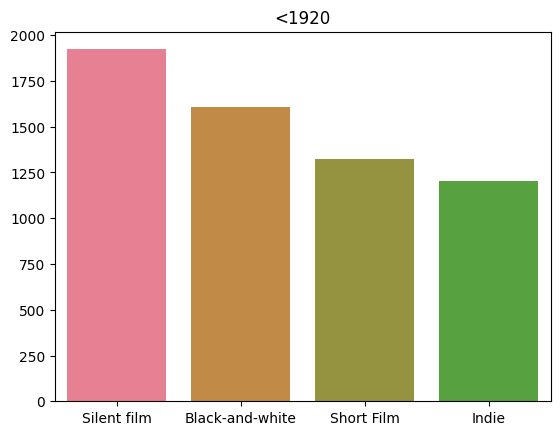

In [406]:

#On extrait une liste avec le nombre de films et une liste avec le genre de ces films

Nombre_de_films = Genre_les_plus_faits_par_decennie.iloc[0, 1::2].values#on prend un élément sur 2 en partant du 2 (les nombre de films)

Genre_de_films = Genre_les_plus_faits_par_decennie.iloc[0, 0::2][:-1].values #On veut pas prendre le decade 



# Créer un DataFrame avec les genres et les nombres de films
df_resultat = pd.DataFrame(data={'Nombre de films': Nombre_de_films}, index=Genre_de_films)

print(df_resultat)

sns.barplot(df_resultat, x=Genre_de_films, y=Nombre_de_films,palette=correspondance_couleurs)

# Ajouter un titre au graphique
plt.title(Genre_les_plus_faits_par_decennie.iloc[0, -1])

# Afficher le graphique
plt.show()


# <center> Graphe des genre les plus répendus selon les décennies <center>

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2952657278.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2952657278.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2952657278.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax 

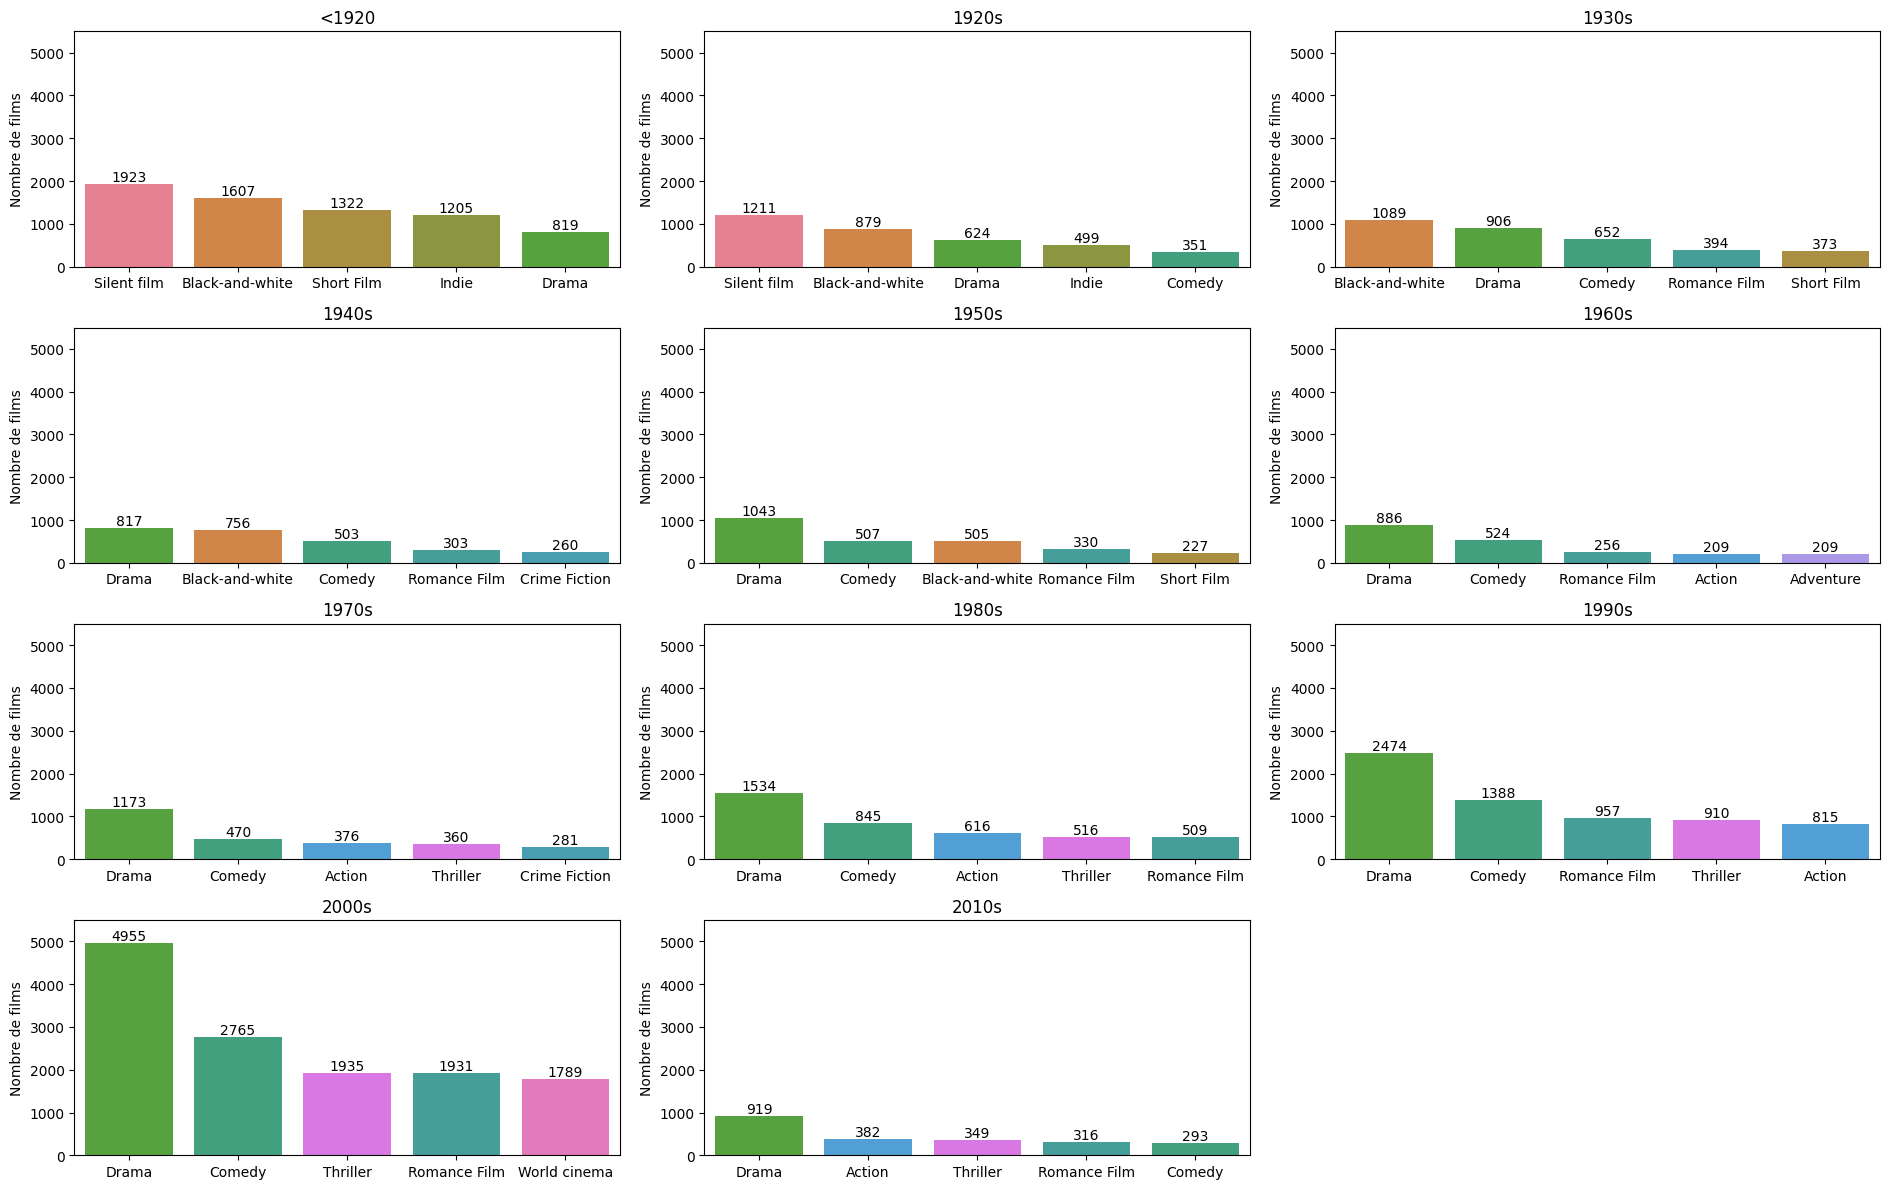

In [527]:

# Définir le nombre de subplots
num_subplots = 11

# Configurer la disposition des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(19, 12))

# Aplatir la liste des axes pour une utilisation plus facile dans la boucle
axes = axes.flatten()

# Boucle pour créer les subplots
for i in range(num_subplots):
    
    Nombre_de_films = Genre_les_plus_faits_par_decennie.iloc[i, 1::2].values#on prend un élément sur 2 en partant du 2 (les nombre de films)

    Genre_de_films = Genre_les_plus_faits_par_decennie.iloc[i, 0::2][:-1].values #On veut pas prendre le decade 

    # Créer un DataFrame avec les genres et les nombres de films
    df_resultat = pd.DataFrame(data={'Nombre de films': Nombre_de_films}, index=Genre_de_films)
    
    # Créer un barplot avec seaborn
    ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])

    # Ajouter un titre au graphique
    # Fixer la limite supérieure de l'axe y à 5000
    axes[i].set_ylim(0, 5500)

    axes[i].set_title(Genre_les_plus_faits_par_decennie.iloc[i, -1])
    
    for i in ax.containers:
        
        ax.bar_label(i,)


# Masquer les axes vides s'il y en a
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')
    
# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()


# On voit qu'il y a beaucoup de films en noirs et blanc et de films muets, mais penchons nous sur les vrais genres 

In [531]:
# Supprimer les colonnes "Black-and-white" et "Silent film"
genres_by_decade_real_genres = genres_by_decade.copy()

# Supprimer les colonnes "Black-and-white" et "Silent film"
genres_by_decade_real_genres = genres_by_decade_real_genres.drop(columns=["Black-and-white", "Silent film"], errors='ignore')




# Afficher le DataFrame mis à jour
print(genres_by_decade_real_genres)

Genres  Action  Action/Adventure  Adventure  Comedy  Crime Fiction  Drama  \
Decade                                                                      
<1920       31                 3         60     650             28    819   
1920s       86                13        112     351             80    624   
1930s      196               113        172     652            239    906   
1940s      147               100        152     503            260    817   
1950s      191               147        220     507            226   1043   
1960s      209               152        209     524            206    886   
1970s      376               256        208     470            281   1173   
1980s      616               319        316     845            381   1534   
1990s      815               446        387    1388            652   2474   
2000s     1549               892        733    2765           1050   4955   
2010s      382                79        146     293            159    919   

In [533]:
import pandas as pd



Genre_les_plus_faits_par_decennie_real_genre = extract_top_genres(genres_by_decade_real_genres, num_top_genres=5)
Genre_les_plus_faits_par_decennie_real_genre 

,Genre le plus repandu,Nombre de films du genre le plus rependu,2 ème genre le plus répandu,Nombre de films du 2 ème genre le plus rependu,3 ème genre le plus répandu,Nombre de films du 3 ème genre le plus rependu,4 ème genre le plus répandu,Nombre de films du 4 ème genre le plus rependu,5 ème genre le plus répandu,Nombre de films du 5 ème genre le plus rependu,Decade
Decade,,,,,,,,,,,
<1920,Short Film,1322,Indie,1205,Drama,819,Comedy,650,Romance Film,82,<1920
1920s,Drama,624,Indie,499,Comedy,351,Short Film,282,Romance Film,217,1920s
1930s,Drama,906,Comedy,652,Romance Film,394,Short Film,373,Crime Fiction,239,1930s
1940s,Drama,817,Comedy,503,Romance Film,303,Crime Fiction,260,Short Film,251,1940s
1950s,Drama,1043,Comedy,507,Romance Film,330,Short Film,227,Crime Fiction,226,1950s
1960s,Drama,886,Comedy,524,Romance Film,256,Action,209,Adventure,209,1960s
1970s,Drama,1173,Comedy,470,Action,376,Thriller,360,Crime Fiction,281,1970s
1980s,Drama,1534,Comedy,845,Action,616,Thriller,516,Romance Film,509,1980s
1990s,Drama,2474,Comedy,1388,Romance Film,957,Thriller,910,Action,815,1990s


{'Short Film': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'Indie': (0.8616090647292522, 0.536495730113334, 0.19548899031476086), 'Drama': (0.6804189127793346, 0.6151497514677574, 0.19405452111445337), 'Comedy': (0.46810256823426105, 0.6699492535792404, 0.1928958739904499), 'Romance Film': (0.20125317221201128, 0.6907920815379026, 0.47966761189275336), 'Crime Fiction': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), 'Action': (0.2197995660828324, 0.6625157876850336, 0.7732093159317209), 'Adventure': (0.433280341176423, 0.6065273407962815, 0.9585467098271748), 'Thriller': (0.8004936186423958, 0.47703363533737203, 0.9579547196007522), 'World cinema': (0.9622723935096688, 0.3976451968965351, 0.8008274363432775)}


# <center> Regarder la répartition des genres sans les films noirs et blanc et muets

{'Short Film': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'Indie': (0.8616090647292522, 0.536495730113334, 0.19548899031476086), 'Drama': (0.6804189127793346, 0.6151497514677574, 0.19405452111445337), 'Comedy': (0.46810256823426105, 0.6699492535792404, 0.1928958739904499), 'Romance Film': (0.20125317221201128, 0.6907920815379026, 0.47966761189275336), 'Crime Fiction': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), 'Action': (0.2197995660828324, 0.6625157876850336, 0.7732093159317209), 'Adventure': (0.433280341176423, 0.6065273407962815, 0.9585467098271748), 'Thriller': (0.8004936186423958, 0.47703363533737203, 0.9579547196007522), 'World cinema': (0.9622723935096688, 0.3976451968965351, 0.8008274363432775)}


C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\3730319013.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\3730319013.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\3730319013.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax 

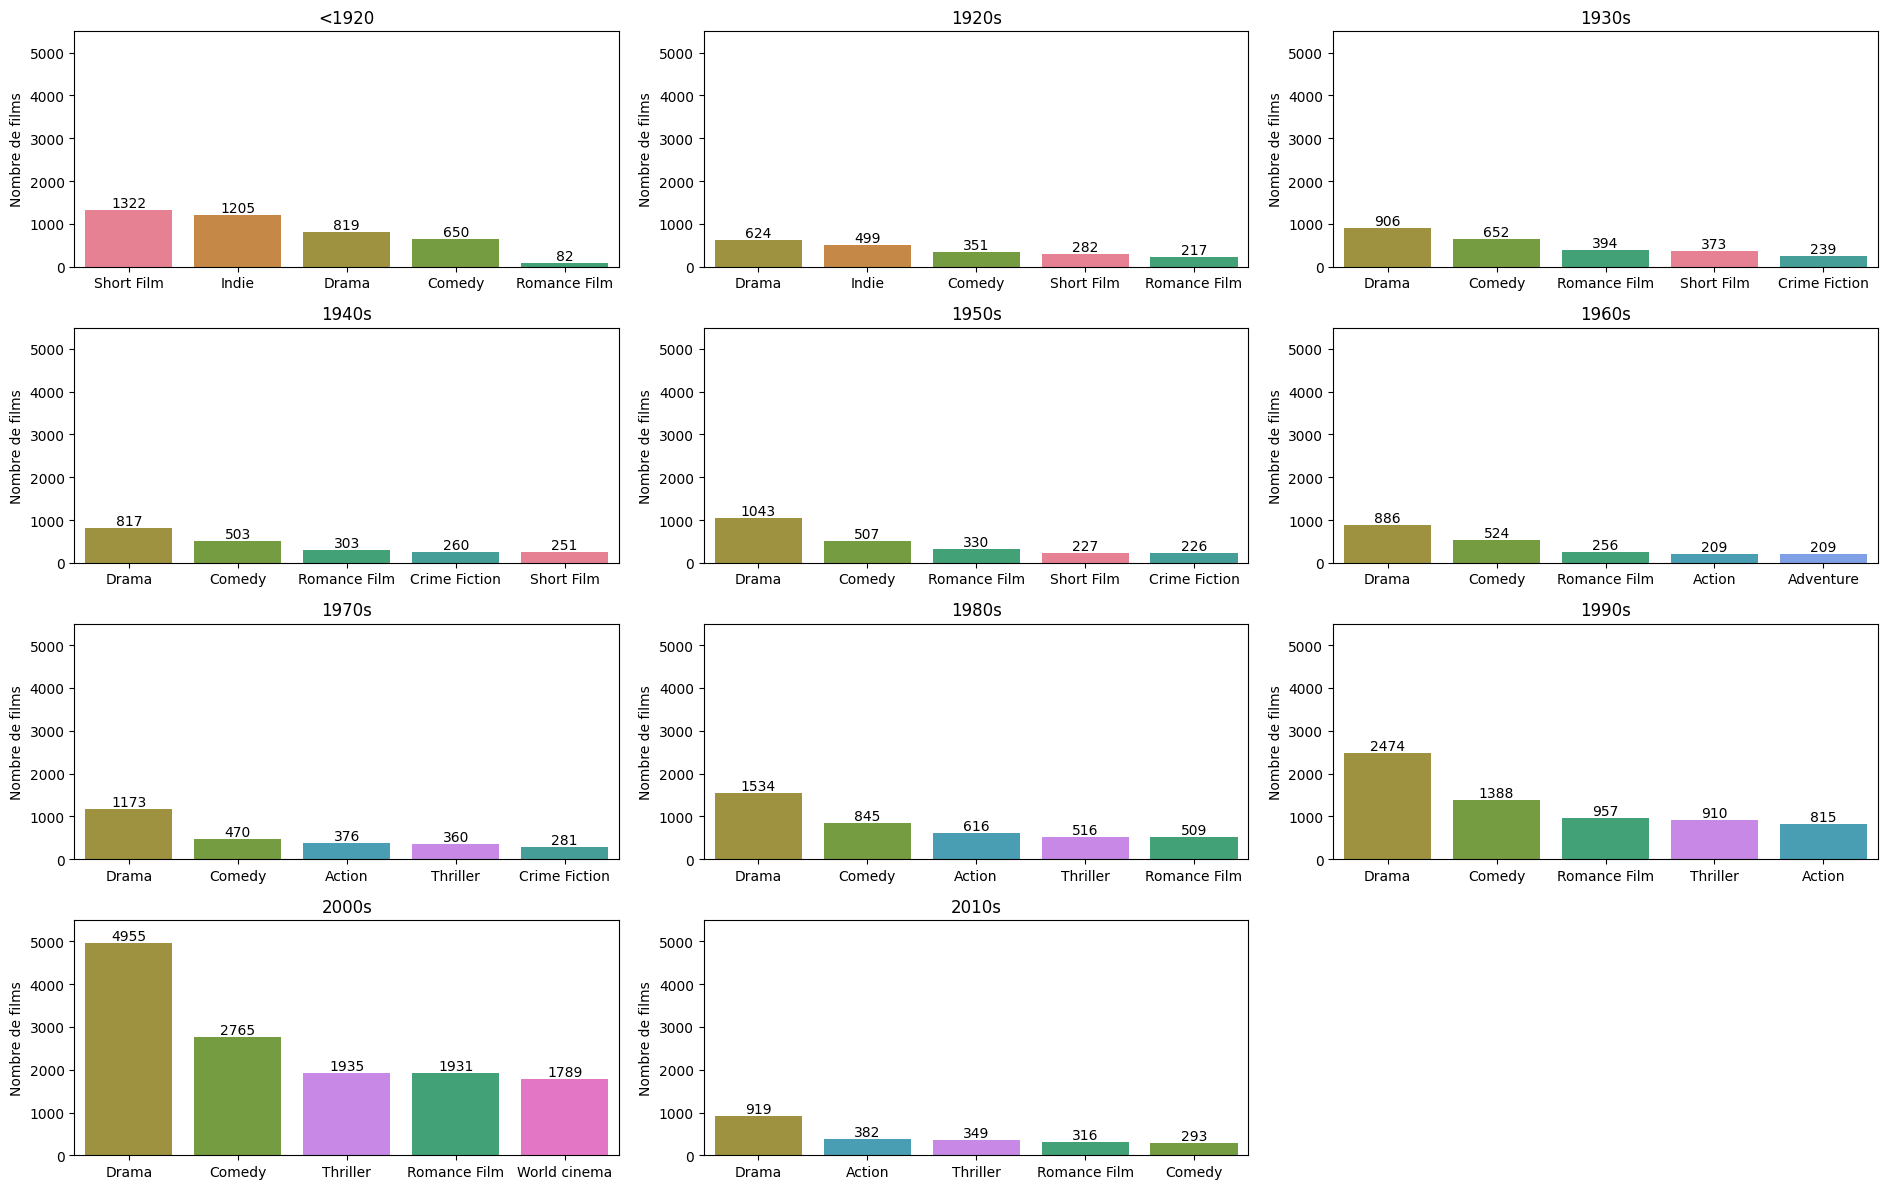

In [537]:
# Sélectionner les éléments genre totaux
Genre = Genre_les_plus_faits_par_decennie_real_genre .iloc[:, 0::2].iloc[:, :-1].values.flatten()

# Obtenir les valeurs uniques
Genre_unique = pd.unique(Genre)


# Utiliser une palette de couleurs avec seaborn
palette_couleurs = sns.color_palette("husl", len(Genre_unique))

# Créer un dictionnaire de correspondance entre les valeurs et les couleurs
correspondance_couleurs = dict(zip(Genre_unique, palette_couleurs))

# Appliquer les couleurs aux valeurs uniques
couleurs = [correspondance_couleurs[val] for val in Genre_unique]

correspondance_couleurs

print(correspondance_couleurs)


# Définir le nombre de subplots
num_subplots = 11

# Configurer la disposition des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(19, 12))

# Aplatir la liste des axes pour une utilisation plus facile dans la boucle
axes = axes.flatten()

# Boucle pour créer les subplots
for i in range(num_subplots):
    
    Nombre_de_films = Genre_les_plus_faits_par_decennie_real_genre.iloc[i, 1::2].values#on prend un élément sur 2 en partant du 2 (les nombre de films)

    Genre_de_films = Genre_les_plus_faits_par_decennie_real_genre.iloc[i, 0::2][:-1].values #On veut pas prendre le decade 

    # Créer un DataFrame avec les genres et les nombres de films
    df_resultat = pd.DataFrame(data={'Nombre de films': Nombre_de_films}, index=Genre_de_films)
    
    # Créer un barplot avec seaborn
    ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])

    # Ajouter un titre au graphique
    # Fixer la limite supérieure de l'axe y à 5000
    axes[i].set_ylim(0, 5500)

    axes[i].set_title(Genre_les_plus_faits_par_decennie.iloc[i, -1])
    
    for i in ax.containers:
        
        ax.bar_label(i,)


# Masquer les axes vides s'il y en a
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')
    
# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()


# <center> Regarder les genres qui rapportent le plus de revenues par décennie <center>



# Ajouter une colonne avec les revenus ajustés par rapport à l'inflation

- On va devoir cleaner notre dataset car il manque sûrement des données des revenus 

- On va regarder les revenus avec et sans prendre en compte l'inflation

- On va ajouter une colonne avec les revenues ajusté pour chaque année

# Suppression des films qui ont comme valeur pour la feature "Revenue" un NaN

Ici on supprime d'abord les  films qui n'ont pas de données sur le revenue

In [408]:
result_cleaned_movie_data_year_revenus = result_cleaned_movie_data_year.copy()
# Supprimer les lignes avec des valeurs NaN dans la colonne "Revenue"
result_cleaned_movie_data_year_revenus = result_cleaned_movie_data_year_revenus.dropna(subset=['Revenue'])

# Réindexer le DataFrame après la suppression des lignes
result_cleaned_movie_data_year_revenus = result_cleaned_movie_data_year_revenus.reset_index(drop=True)




print(len(result_cleaned_movie_data_year))
print(len(result_cleaned_movie_data_year_revenus))

result_cleaned_movie_data_year_revenus

34050
6675


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,...",2001,2000s
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Musical, Comedy, Black-and-white]",1938,1930s
2,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Costume drama, War film, Epic, Period piece, ...",1989,1980s
3,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Children's/Family, Musical, Fantasy, Comedy, ...",1964,1960s
4,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Future noir, Indie...",1999,1990s
...,...,...,...,...,...,...,...,...,...,...,...
6670,6740261,/m/0glmbl,Eternally Yours,1939-10-07,683131.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Family Drama, Black-and-white, Drama, Comedy,...",1939,1930s
6671,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Romantic comedy, Comedy of manners, Drama, Co...",1988,1980s
6672,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","[Parody, Americana, Comedy]",2000,1990s
6673,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","[Thriller, Erotic thriller, Psychological thri...",1993,1990s


- On voit que en supprimant les films qui n'ont pas de données sur les revenus, on **perd pratiquement 30'000 films**

# <center> Regarder les revenus totaux par decade sans prendre en compte l'inflation

In [409]:
# Grouper par décennie et calculer les revenus
Revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].sum()

Revenues_by_decade


C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2152374536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].sum()


Decade
<1920    2.931728e+06
1920s    7.637296e+07
1930s    1.134355e+09
1940s    6.970481e+08
1950s    2.131348e+09
1960s    5.050329e+09
1970s    1.438863e+10
1980s    3.669835e+10
1990s    9.435338e+10
2000s    1.886373e+11
2010s    4.070918e+10
Name: Revenue, dtype: float64

# <center>Revenues par décennies sans prendre en compte l'inflation

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\708077561.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].sum().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\708077561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Decade', y='Revenue', data=Revenues_by_decade, palette=palette_couleurs)


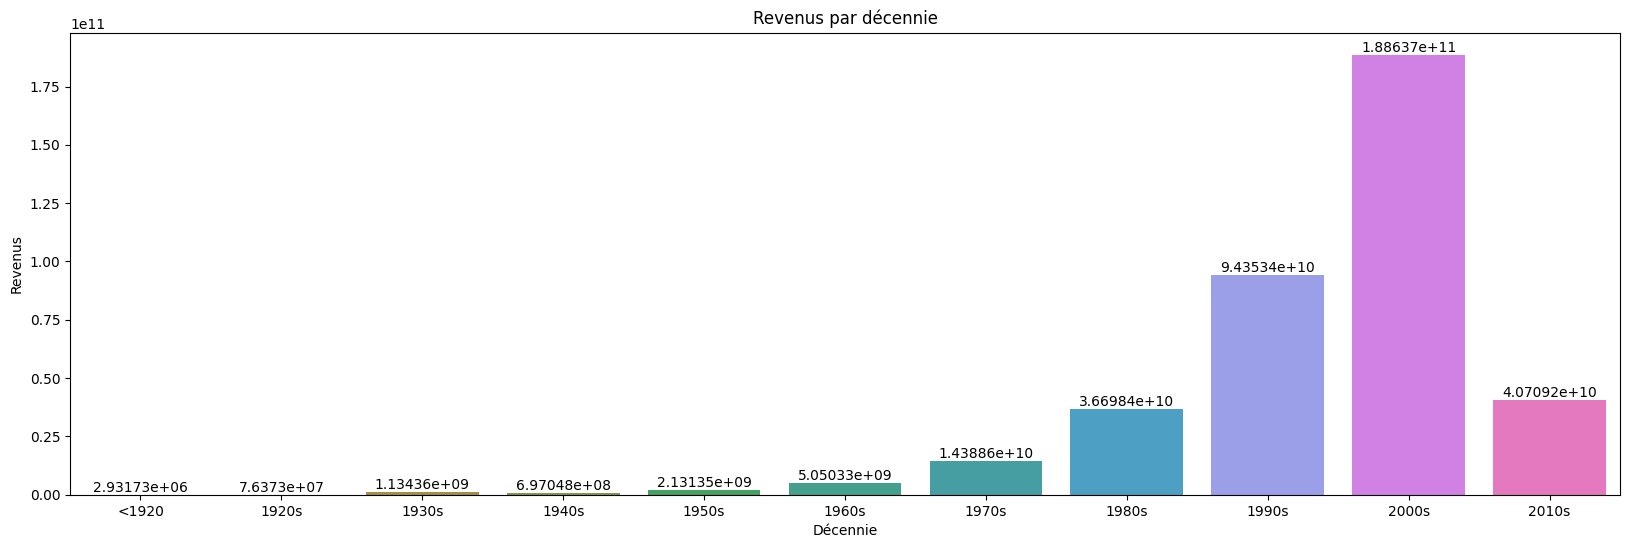

In [410]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par décennie et calculer les revenus
Revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].sum().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs = sns.color_palette("husl", n_colors=len(Revenues_by_decade))

# Créer un barplot avec seaborn
plt.figure(figsize=(20, 6))  # Ajustez la largeur selon votre préférence
ax = sns.barplot(x='Decade', y='Revenue', data=Revenues_by_decade, palette=palette_couleurs)
for i in ax.containers:
        
        ax.bar_label(i,)
# Ajouter des titres et des labels
plt.title('Revenus par décennie')
plt.xlabel('Décennie')
plt.ylabel('Revenus')

# Afficher le graphique
plt.show()

# <center> Moyenne des révenues par décennie sans prendre en compte l'inflation

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\4230019790.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Average_revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].mean().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\4230019790.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Decade', y='Revenue', data=Average_revenues_by_decade, palette=palette_couleurs)


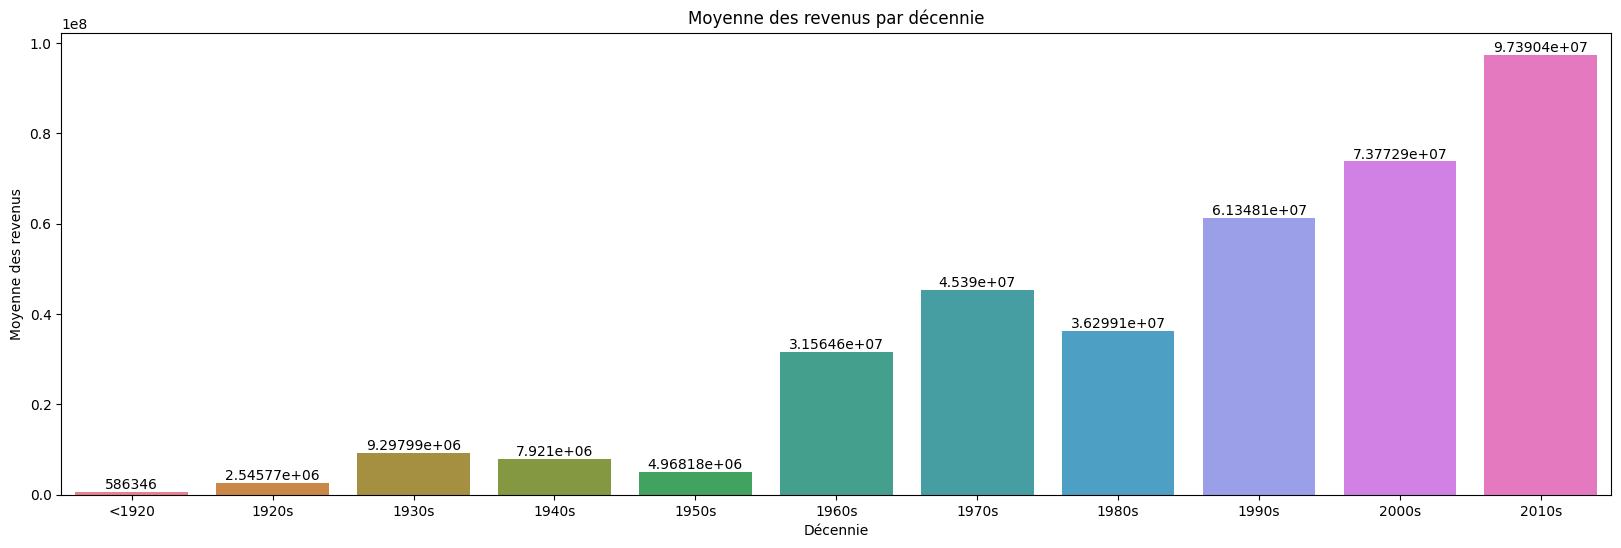

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par décennie et calculer la moyenne des revenus
Average_revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].mean().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs = sns.color_palette("husl", n_colors=len(Average_revenues_by_decade))

# Créer un barplot avec seaborn
plt.figure(figsize=(20, 6))  # Ajustez la largeur selon votre préférence
ax = sns.barplot(x='Decade', y='Revenue', data=Average_revenues_by_decade, palette=palette_couleurs)
for i in ax.containers:
    ax.bar_label(i)

# Ajouter des titres et des labels
plt.title('Moyenne des revenus par décennie')
plt.xlabel('Décennie')
plt.ylabel('Moyenne des revenus')

# Afficher le graphique
plt.show()


# <center> Moyenne des revenues par décennie en prenant en compte l'inflation et sans prendre en compte l'inflation

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1329294112.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Mean_revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].mean().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1329294112.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Average_revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].mean().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1329294112.py:24: FutureWarning: 

Passing `palette` without assigning `hue` 

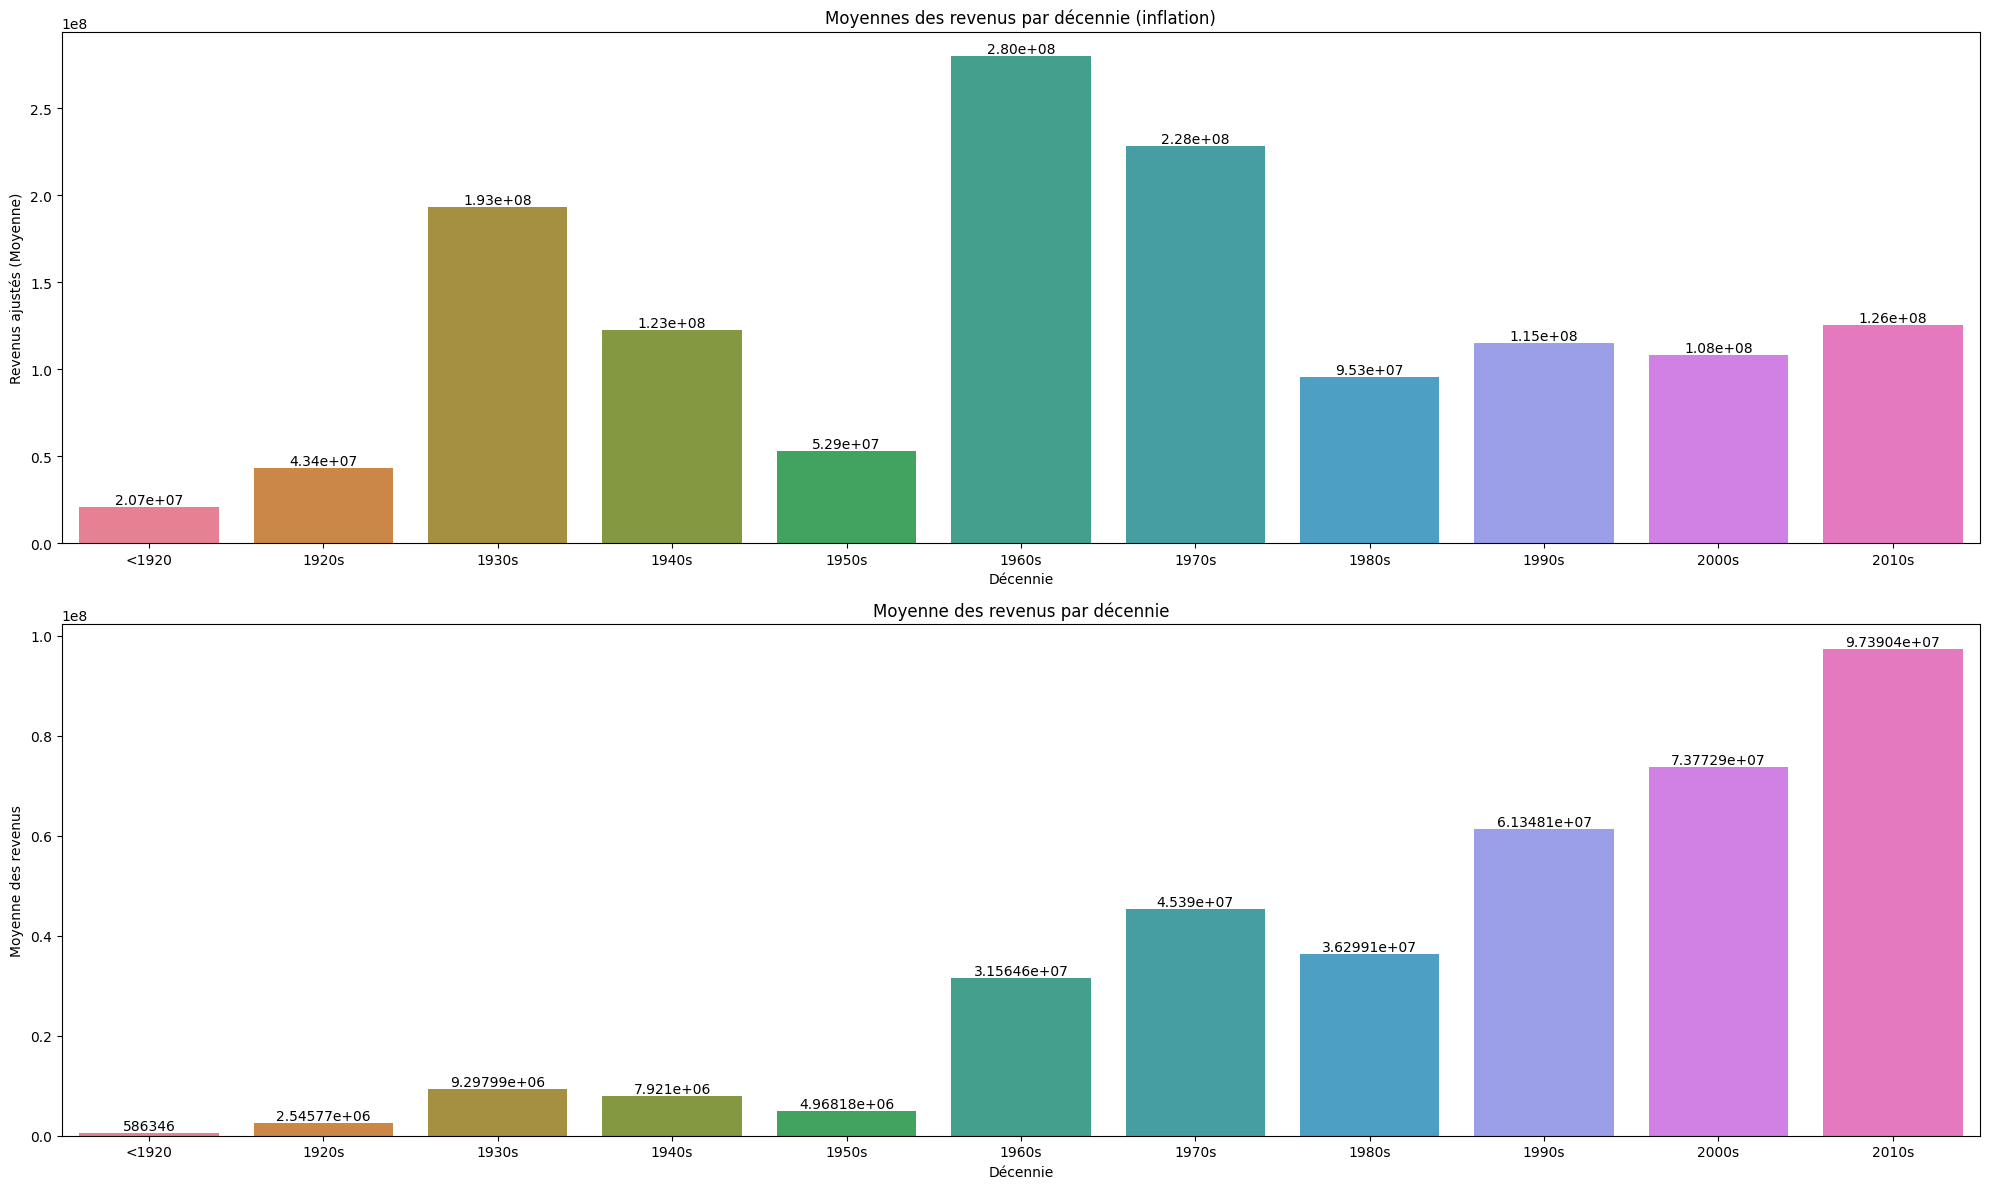

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Grouper par décennie et calculer les moyennes des revenus (inflation)
Mean_revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].mean().reset_index()

# Grouper par décennie et calculer la moyenne des revenus
Average_revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].mean().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs_inflation = sns.color_palette("husl", n_colors=len(Mean_revenues_by_decade_inflation))
palette_couleurs_average = sns.color_palette("husl", n_colors=len(Average_revenues_by_decade))

# Convertir en DataFrame
Mean_revenues_by_decade_inflation_df = pd.DataFrame(Mean_revenues_by_decade_inflation)
Average_revenues_by_decade_df = pd.DataFrame(Average_revenues_by_decade)

# Créer un subplot avec deux graphiques
fig, axes = plt.subplots(nrows=2, figsize=(20, 12))

# Graphique 1 : Moyennes des revenus par décennie (inflation)
ax1 = sns.barplot(x='Decade', y='revenue_adjusted', data=Mean_revenues_by_decade_inflation_df, palette=palette_couleurs_inflation, ax=axes[0])
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2e', label_type='edge')  # fmt='%.2e' pour l'écriture scientifique avec deux décimales
ax1.set_title('Moyennes des revenus par décennie (inflation)')
ax1.set_xlabel('Décennie')
ax1.set_ylabel('Revenus ajustés (Moyenne)')

# Graphique 2 : Moyenne des revenus par décennie
ax2 = sns.barplot(x='Decade', y='Revenue', data=Average_revenues_by_decade_df, palette=palette_couleurs_average, ax=axes[1])
for i in ax2.containers:
    ax2.bar_label(i)
ax2.set_title('Moyenne des revenus par décennie')
ax2.set_xlabel('Décennie')
ax2.set_ylabel('Moyenne des revenus')

# Ajustements de la mise en page
plt.tight_layout()
plt.show()


# <center> Mediane des revenues par décennie en prenant en compte l'inflation et sans prendre en compte l'inflation

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\877986146.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Mean_revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].median().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\877986146.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Average_revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].median().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\877986146.py:24: FutureWarning: 

Passing `palette` without assigning `hue`

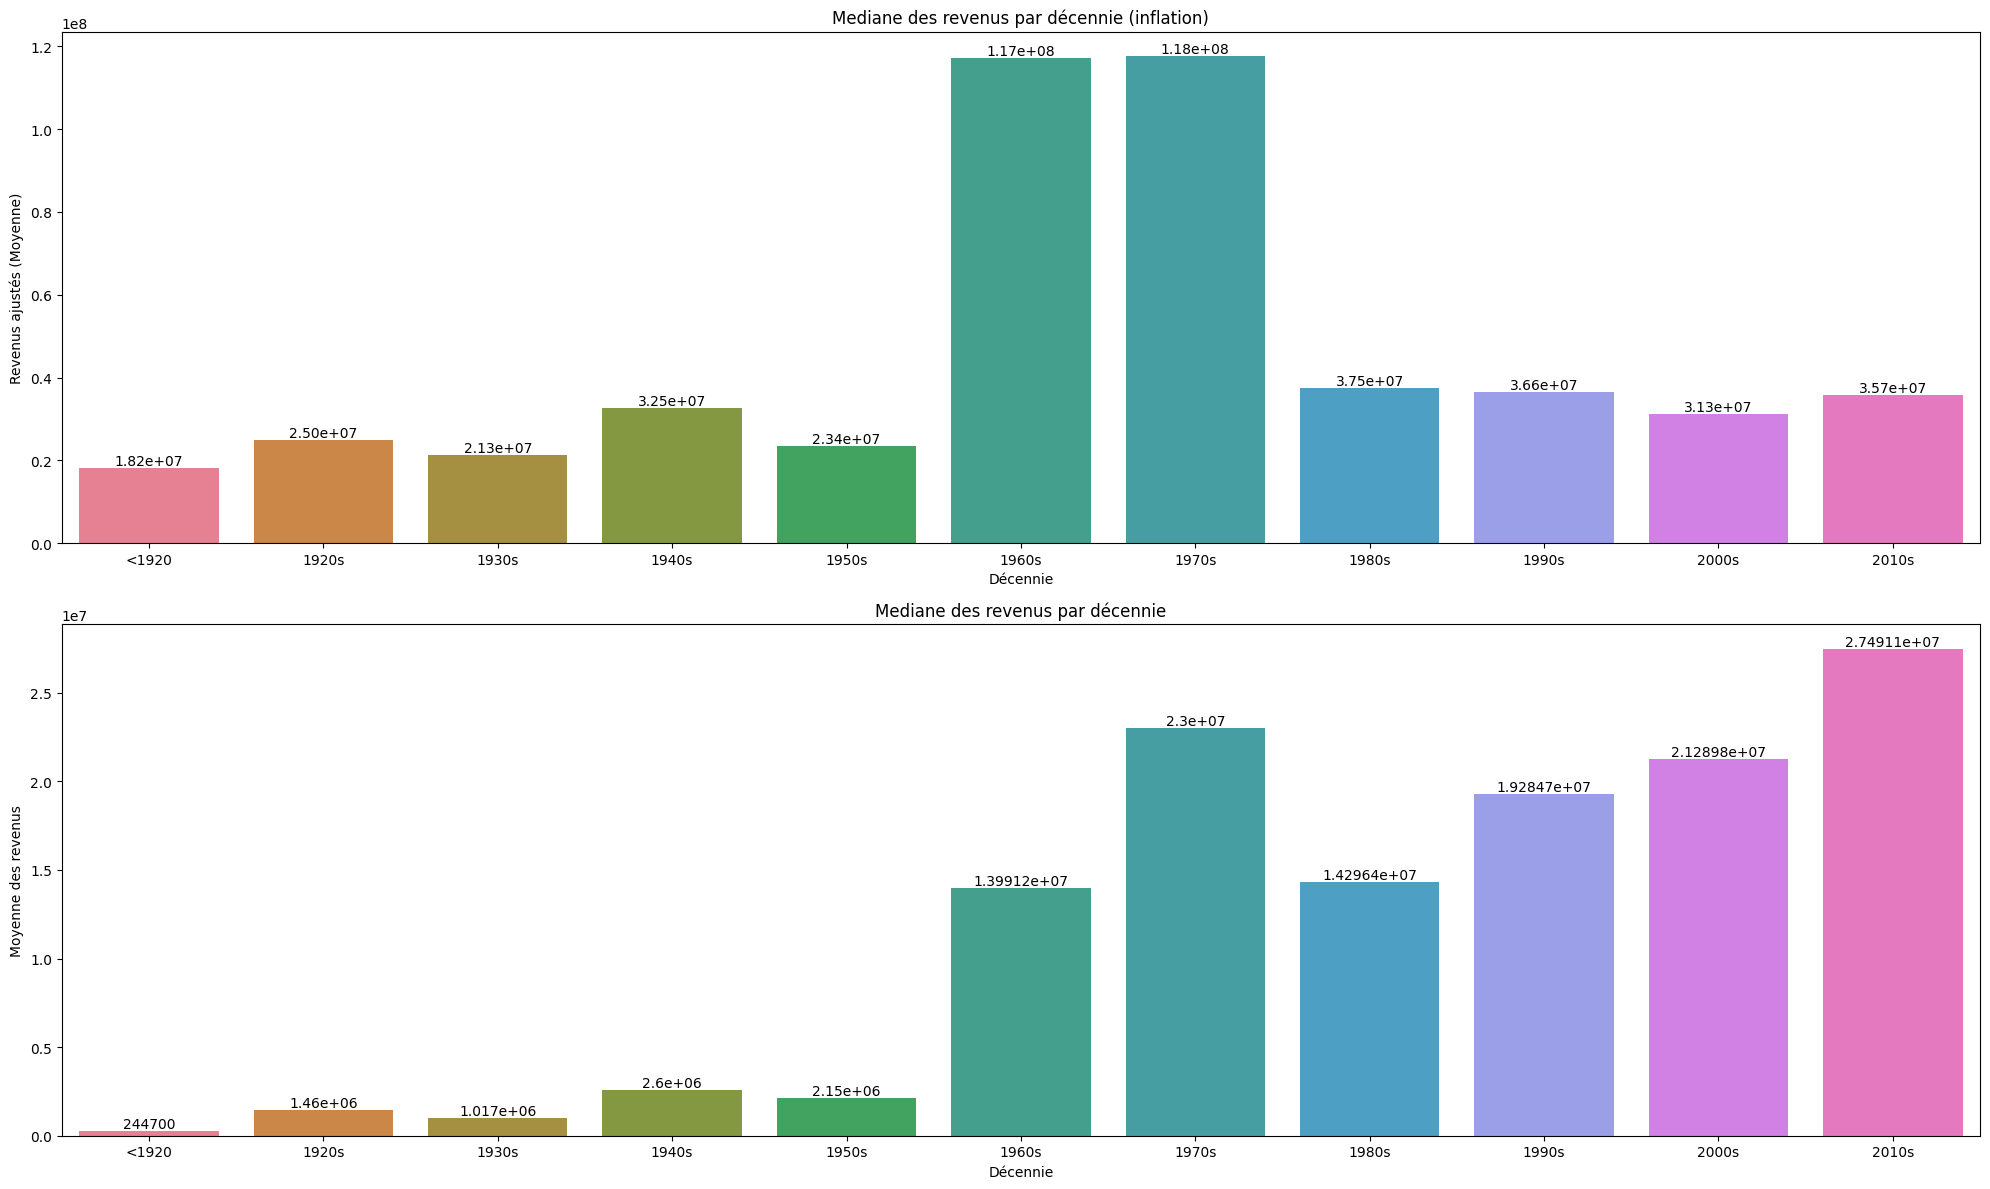

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Grouper par décennie et calculer les moyennes des revenus (inflation)
Mean_revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].median().reset_index()

# Grouper par décennie et calculer la moyenne des revenus
Average_revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].median().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs_inflation = sns.color_palette("husl", n_colors=len(Mean_revenues_by_decade_inflation))
palette_couleurs_average = sns.color_palette("husl", n_colors=len(Average_revenues_by_decade))

# Convertir en DataFrame
Mean_revenues_by_decade_inflation_df = pd.DataFrame(Mean_revenues_by_decade_inflation)
Average_revenues_by_decade_df = pd.DataFrame(Average_revenues_by_decade)

# Créer un subplot avec deux graphiques
fig, axes = plt.subplots(nrows=2, figsize=(20, 12))

# Graphique 1 : Moyennes des revenus par décennie (inflation)
ax1 = sns.barplot(x='Decade', y='revenue_adjusted', data=Mean_revenues_by_decade_inflation_df, palette=palette_couleurs_inflation, ax=axes[0])
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2e', label_type='edge')  # fmt='%.2e' pour l'écriture scientifique avec deux décimales
ax1.set_title('Mediane des revenus par décennie (inflation)')
ax1.set_xlabel('Décennie')
ax1.set_ylabel('Revenus ajustés (Moyenne)')

# Graphique 2 : Moyenne des revenus par décennie
ax2 = sns.barplot(x='Decade', y='Revenue', data=Average_revenues_by_decade_df, palette=palette_couleurs_average, ax=axes[1])
for i in ax2.containers:
    ax2.bar_label(i)
ax2.set_title('Mediane des revenus par décennie')
ax2.set_xlabel('Décennie')
ax2.set_ylabel('Moyenne des revenus')

# Ajustements de la mise en page
plt.tight_layout()
plt.show()


In [420]:
result_cleaned_movie_data_year_revenus_genre = result_cleaned_movie_data_year_revenus.explode('Genres')

result_cleaned_movie_data_year_revenus_genre

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Thriller,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Science Fiction,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Horror,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Adventure,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Supernatural,2001,2000s
...,...,...,...,...,...,...,...,...,...,...,...
6673,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}",Psychological thriller,1993,1990s
6673,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}",Crime Thriller,1993,1990s
6673,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}",Courtroom Drama,1993,1990s
6674,26482675,/m/0bbwngb,Eşrefpaşalılar,2010-03-05,1847671.0,NaN,{},{},Comedy film,2010,2000s


In [421]:
print(len(result_cleaned_movie_data_year_revenus_genre))

34791


In [422]:
# Compter le nombre de valeurs uniques dans la colonne "Wiki ID"
nombre_unique_wiki_id = result_cleaned_movie_data_year_revenus_genre['Wiki ID'].nunique()

# Afficher le résultat
print("Nombre de valeurs uniques dans la colonne 'Wiki ID' :", nombre_unique_wiki_id)

Nombre de valeurs uniques dans la colonne 'Wiki ID' : 6675


In [423]:
# Compter le nombre de lignes identiques
nombre_lignes_identiques = result_cleaned_movie_data_year_revenus_genre.duplicated().sum()

# Afficher le résultat
print("Nombre de lignes identiques dans le DataFrame :", nombre_lignes_identiques)


Nombre de lignes identiques dans le DataFrame : 1


In [424]:

# Vérifier les doublons
doublons_genres = result_cleaned_movie_data_year_revenus_genre[result_cleaned_movie_data_year_revenus_genre.duplicated(subset=['Wiki ID', 'Genres'], keep=False)]

# Afficher les lignes avec des doublons
print("Lignes avec des doublons de genres pour le même film :")
print(doublons_genres[['Wiki ID', 'Genres']])

doublons_genres

Lignes avec des doublons de genres pour le même film :
      Wiki ID   Genres
421  34480764  Western
421  34480764  Western


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade
421,34480764,/m/06w99h3,Rango,2011-02-14,245375374.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Western,2011,2010s
421,34480764,/m/06w99h3,Rango,2011-02-14,245375374.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Western,2011,2010s


In [425]:
#Compter le nombre de ligne avant la suppression du doublon

print(len(result_cleaned_movie_data_year_revenus_genre))

34791


In [428]:
# Supprimer les lignes en double basées sur les colonnes 'Wiki ID' et 'Genres'
result_cleaned_movie_data_year_revenus_genre = result_cleaned_movie_data_year_revenus_genre.drop_duplicates(subset=['Wiki ID', 'Genres'], keep='first')

# Afficher le nombre d'élément dans le dataframe après la suppression de la ligne
print(len(result_cleaned_movie_data_year_revenus_genre))


34790


# <center> Créer un dataframe avec les lignes qui sont les decades, les colonnes les genres et les cases sont les revenues

In [438]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'result_cleaned_movie_data_genre'
# Remplacez 'NomDuVotreDataFrame' par le nom de votre DataFrame

# Créer une table pivot
revenu_by_genre_by_decade = result_cleaned_movie_data_year_revenus_genre.pivot_table(index='Decade', columns='Genres', values='Revenue', aggfunc='sum')

# Remplacer les valeurs NaN par 0
revenu_by_genre_by_decade = revenu_by_genre_by_decade.fillna(0)

# Afficher le DataFrame résultant
revenu_by_genre_by_decade


Genres,Absurdism,Acid western,Action,Action Comedy,Action Thrillers,Action/Adventure,Addiction Drama,Adult,Adventure,Adventure Comedy,...,Vampire movies,War film,Werewolf fiction,Western,Whodunit,Women in prison films,Workplace Comedy,World cinema,Wuxia,Zombie Film
Decade,,,,,,,,,,,,,,,,,,,,,
<1920,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.500000e+06,0.000000e+00,...,0.0,0.000000e+00,0.0,3.317280e+05,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1920s,0.000000e+00,0.0,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,5.500000e+06,0.0,4.970000e+05,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1930s,0.000000e+00,0.0,1.560952e+07,0.000000e+00,0.000000e+00,1.449662e+07,0.0,0.0,1.001327e+08,0.000000e+00,...,0.0,4.086455e+08,0.0,7.147095e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1940s,0.000000e+00,0.0,5.059764e+07,0.000000e+00,0.000000e+00,2.907381e+07,0.0,0.0,3.124068e+08,0.000000e+00,...,0.0,3.314443e+07,0.0,2.381195e+07,0.0,0.0,1.421000e+06,4.521520e+05,0.0,0.000000e+00
1950s,0.000000e+00,0.0,4.215720e+08,0.000000e+00,2.400000e+06,2.898520e+08,8250000.0,0.0,7.014077e+08,1.595000e+07,...,0.0,2.978401e+08,2000000.0,2.125200e+08,0.0,0.0,2.460000e+07,2.465155e+07,0.0,0.000000e+00
1960s,0.000000e+00,0.0,1.348617e+09,0.000000e+00,1.866109e+08,1.169355e+09,0.0,25000000.0,1.213310e+09,0.000000e+00,...,0.0,4.918437e+08,0.0,3.635487e+08,0.0,0.0,0.000000e+00,9.397183e+07,0.0,4.350000e+07
1970s,5.011836e+08,0.0,5.141955e+09,4.892873e+08,6.433275e+08,3.217865e+09,0.0,166344120.0,4.190076e+09,1.152299e+08,...,0.0,2.824588e+08,0.0,2.376827e+08,32511047.0,0.0,1.032905e+08,3.134076e+08,0.0,1.198847e+07
1980s,9.243421e+07,257043.0,1.315882e+10,8.239550e+08,1.768509e+09,1.150365e+10,5805732.0,11060485.0,9.667844e+09,1.358557e+09,...,0.0,1.597464e+09,17985893.0,1.011472e+09,77153487.0,6149983.0,4.989359e+07,6.686196e+08,0.0,1.744095e+08
1990s,1.118135e+09,1025488.0,3.412986e+10,1.505019e+09,7.046996e+09,2.579119e+10,185578971.0,0.0,2.440773e+10,8.715715e+08,...,0.0,5.542487e+09,0.0,1.705462e+09,54418815.0,0.0,7.096554e+08,9.114254e+08,0.0,2.342758e+07


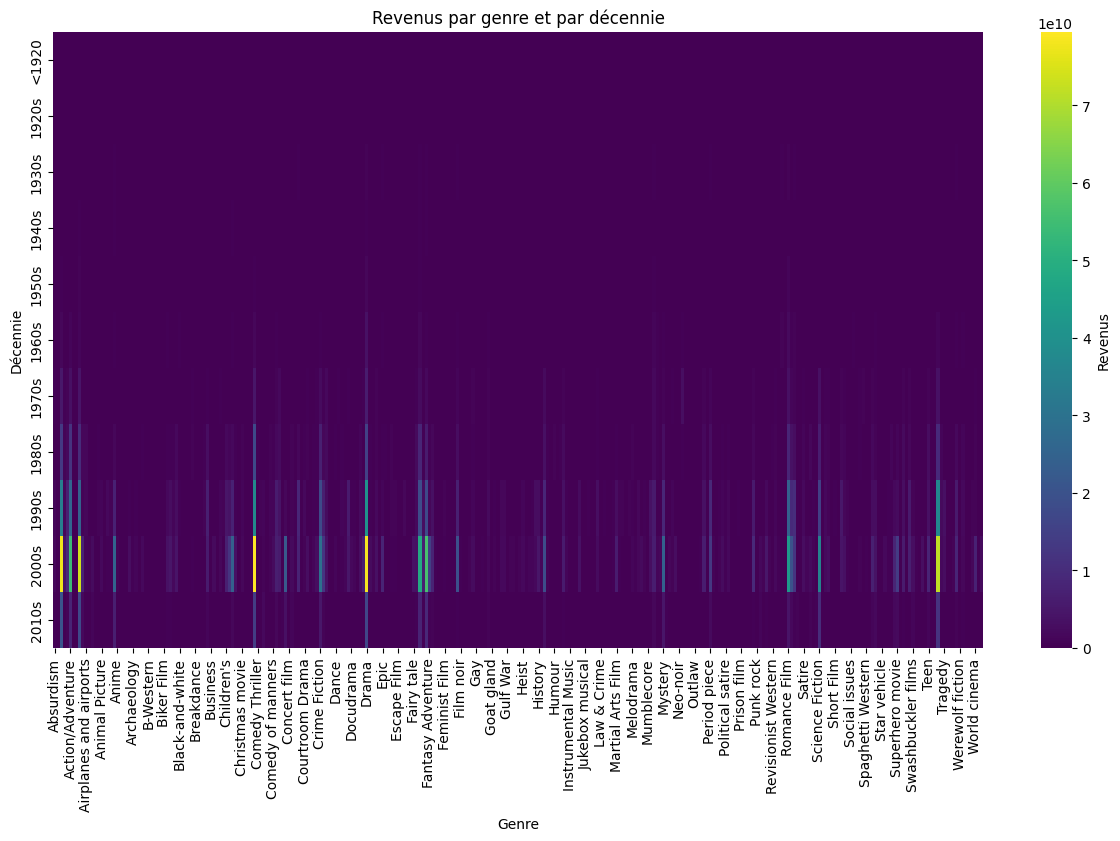

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que le DataFrame 'df' contient vos données

# Définir la taille du graphique
plt.figure(figsize=(15, 8))

# Créer une heatmap avec Seaborn
sns.heatmap(revenu_by_genre_by_decade, cmap='viridis', cbar_kws={'label': 'Revenus'})

# Ajouter des titres et des labels
plt.title('Revenus par genre et par décennie')
plt.xlabel('Genre')
plt.ylabel('Décennie')

# Afficher le graphique
plt.show()


In [449]:
import pandas as pd

def extract_top_genres(genre_by_decade, num_top_genres=4):
    result_df = pd.DataFrame()

    for i in range(1, num_top_genres + 1):
        # Trouver l'indice du genre le plus répandu pour chaque décennie en utilisant iloc
        genre_most_common = genre_by_decade.apply(lambda row: row.nlargest(i).index[-1], axis=1)

        # Trouver le nombre de films pour le genre le plus répandu en utilisant iloc 
        genre_count = genre_by_decade.apply(lambda row: row.nlargest(i).iloc[-1], axis=1)
        if i == 1:
             result_df['Genre le plus rentable'] = genre_most_common
             result_df['Revenu du genre le plus rentable'] = genre_count
            
        else: 

            result_df[f'{i} ème genre le plus rentable'] = genre_most_common
            result_df[f' Nombre de films du {i} ème genre le plus rentable'] = genre_count

    # Sélectionnez uniquement une colonne 'Décennie'
    result_df['Decade'] = genre_by_decade.index

    return result_df

Genre_les_plus_rentables_par_decennie = extract_top_genres(revenu_by_genre_by_decade, num_top_genres=4)
Genre_les_plus_rentables_par_decennie

,Genre le plus rentable,Revenu du genre le plus rentable,2 ème genre le plus rentable,Nombre de films du 2 ème genre le plus rentable,3 ème genre le plus rentable,Nombre de films du 3 ème genre le plus rentable,4 ème genre le plus rentable,Nombre de films du 4 ème genre le plus rentable,Decade
Decade,,,,,,,,,
<1920,Black-and-white,2.831728e+06,Indie,2.831728e+06,Silent film,2.831728e+06,Adventure,1.500000e+06,<1920
1920s,Drama,5.049096e+07,Silent film,3.324900e+07,Black-and-white,2.834498e+07,Musical,2.285998e+07,1920s
1930s,Romance Film,8.809114e+08,Drama,6.491744e+08,Family Film,5.905482e+08,Fantasy,5.878202e+08,1930s
1940s,Family Film,4.757914e+08,Drama,4.466748e+08,Animation,4.190472e+08,Fantasy,3.603993e+08,1940s
1950s,Drama,1.541453e+09,Romance Film,9.406199e+08,Adventure,7.014077e+08,Musical,4.772070e+08,1950s
1960s,Drama,3.691432e+09,Romance Film,2.023221e+09,Action,1.348617e+09,Family Film,1.297048e+09,1960s
1970s,Drama,5.963630e+09,Action,5.141955e+09,Comedy,4.497596e+09,Adventure,4.190076e+09,1970s
1980s,Comedy,1.771743e+10,Drama,1.550706e+10,Action,1.315882e+10,Action/Adventure,1.150365e+10,1980s
1990s,Drama,4.084567e+10,Comedy,3.765166e+10,Thriller,3.695766e+10,Action,3.412986e+10,1990s


# <center> Attribution des couleurs

In [450]:
# Sélectionner les éléments genre totaux
Genre = Genre_les_plus_rentables_par_decennie .iloc[:, 0::2].iloc[:, :-1].values.flatten()

# Obtenir les valeurs uniques
Genre_unique = pd.unique(Genre)


# Utiliser une palette de couleurs avec seaborn
palette_couleurs = sns.color_palette("husl", len(Genre_unique))

# Créer un dictionnaire de correspondance entre les valeurs et les couleurs
correspondance_couleurs = dict(zip(Genre_unique, palette_couleurs))

# Appliquer les couleurs aux valeurs uniques
couleurs = [correspondance_couleurs[val] for val in Genre_unique]

correspondance_couleurs

print(correspondance_couleurs)



{'Black-and-white': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'Indie': (0.9386807511529497, 0.48901639250529133, 0.19623149776413562), 'Silent film': (0.7757319041862729, 0.5784925270759935, 0.19475566538551875), 'Adventure': (0.6566480096570136, 0.6229564921397143, 0.1938976562578914), 'Drama': (0.5105309046900421, 0.6614299289084904, 0.1930849118538962), 'Musical': (0.19468252393000074, 0.6998280342882891, 0.3041476695746048), 'Romance Film': (0.20433460114757862, 0.6863857739476534, 0.5407103379425205), 'Family Film': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), 'Fantasy': (0.21662978923073606, 0.6676586160122123, 0.7318695594345369), 'Animation': (0.2266813382629933, 0.6508721810235698, 0.85618939194681), 'Action': (0.5049017849530067, 0.5909119231215284, 0.9584657252128558), 'Comedy': (0.7563369715809057, 0.5008642633638004, 0.9580503362615219), 'Action/Adventure': (0.9587050080494409, 0.3662259565791742, 0.9231469575614251), 'Thriller': (0.9

# <center> Barplot des revenus générés par genre pour chaque decade

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2854203561.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2854203561.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\2854203561.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax 

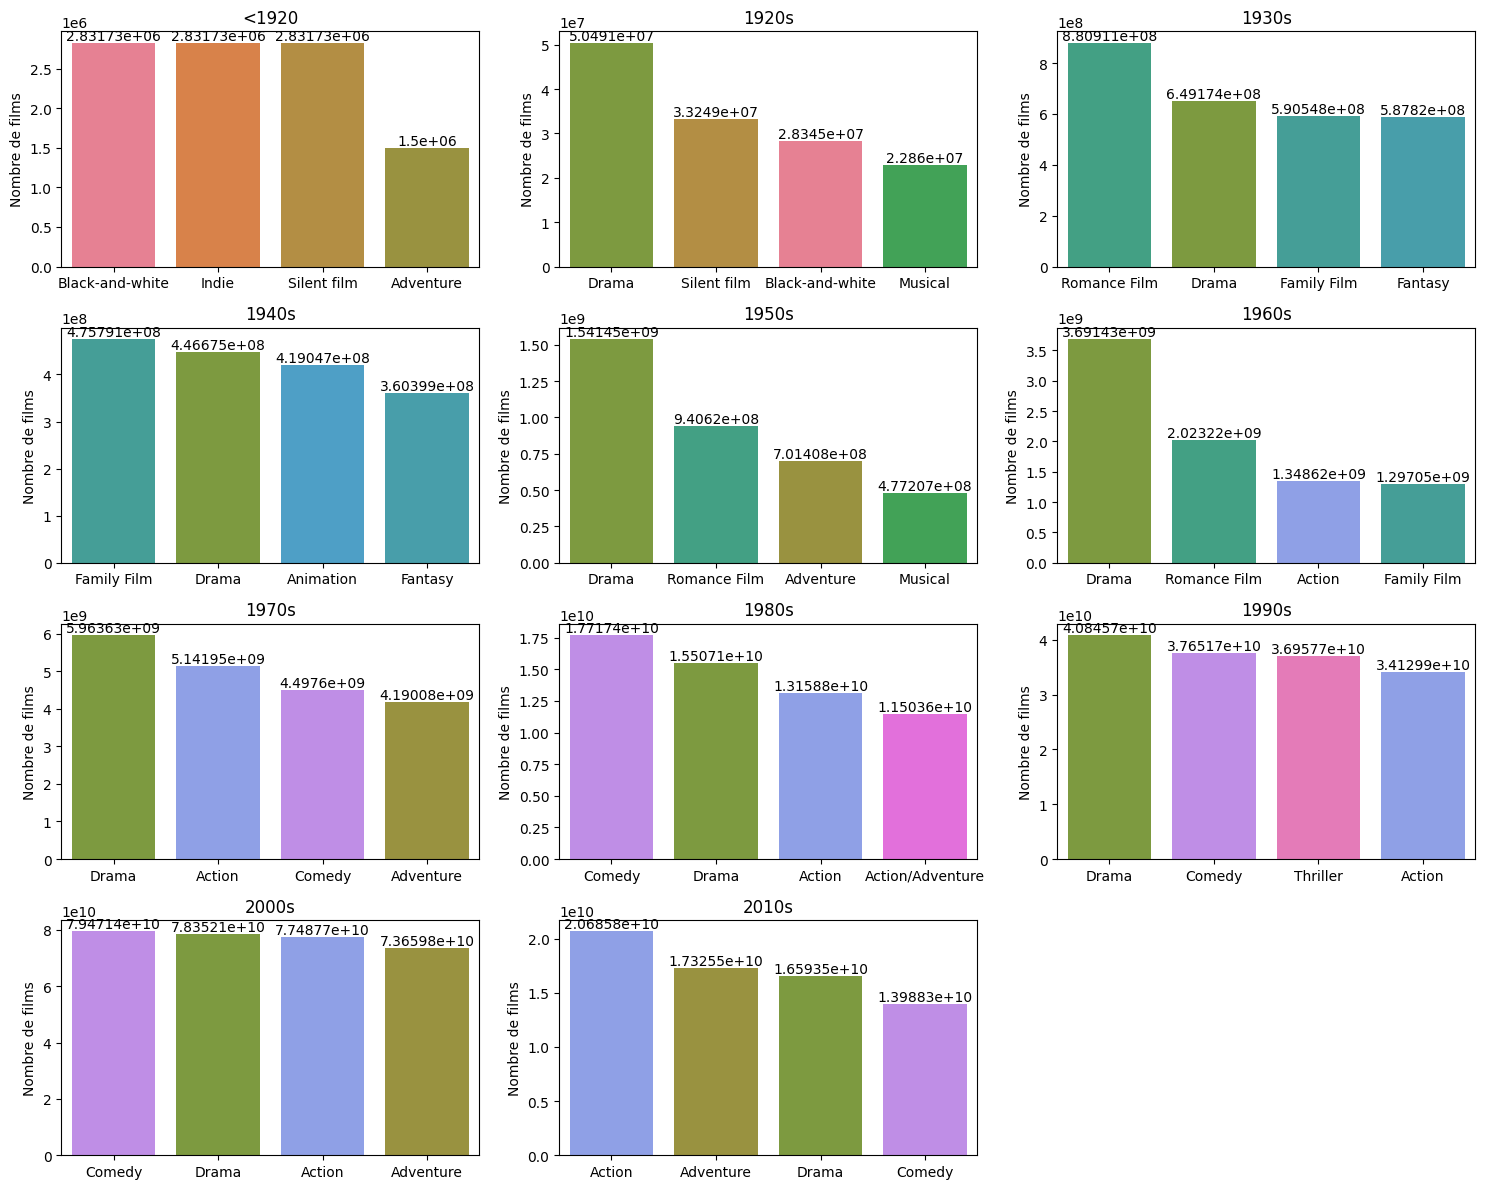

In [451]:

# Définir le nombre de subplots
num_subplots = 11

# Configurer la disposition des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Aplatir la liste des axes pour une utilisation plus facile dans la boucle
axes = axes.flatten()

# Boucle pour créer les subplots
for i in range(num_subplots):
    
    Nombre_de_films = Genre_les_plus_rentables_par_decennie.iloc[i, 1::2].values#on prend un élément sur 2 en partant du 2 (les nombre de films)

    Genre_de_films = Genre_les_plus_rentables_par_decennie.iloc[i, 0::2][:-1].values #On veut pas prendre le decade 

    # Créer un DataFrame avec les genres et les nombres de films
    df_resultat = pd.DataFrame(data={'Nombre de films': Nombre_de_films}, index=Genre_de_films)
    
    # Créer un barplot avec seaborn
    ax = sns.barplot(x=Genre_de_films, y='Nombre de films', data=df_resultat, palette=correspondance_couleurs, ax=axes[i])

    # Ajouter un titre au graphique
    # Fixer la limite supérieure de l'axe y à 5000
   

    axes[i].set_title(Genre_les_plus_rentables_par_decennie.iloc[i, -1])
    
    for i in ax.containers:
        
        ax.bar_label(i,)


# Masquer les axes vides s'il y en a
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')
    
# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()


# <center> LE CPI NE PREND PAS EN COMPTE LES DONNES AVANT 1913

- Le problème est que le CPI ne peut prendre en compte que des données après 1913

- Cependant notre data set démarre de 1897

- Il faut regarder maintenant combien de films nous serions prêts à mettre à la poubelle pour réaliser un calcul sur l'inflation

In [411]:

# Compter le nombre de films sortis avant 1913
films_avant_1913 = result_cleaned_movie_data_year_revenus[result_cleaned_movie_data_year_revenus['year'] < 1913]
nombre_films_avant_1913 = len(films_avant_1913)

print(f"Nombre de films sortis avant 1913 : {nombre_films_avant_1913}")


Nombre de films sortis avant 1913 : 1


On a en fait qu'un film qu'on jeterait, on peut donc procéder aux calculs de l'inflation sur le revenu en éliminant cette donnée

In [412]:

import cpi

# Filtrer les données pour ne conserver que celles à partir de 1913
result_cleaned_movie_data_year_revenus_inflation = result_cleaned_movie_data_year_revenus[result_cleaned_movie_data_year_revenus['Release date'].dt.year >= 1913]

# Ajouter une nouvelle colonne "revenue_adjusted" avec les revenus ajustés en fonction de l'inflation
result_cleaned_movie_data_year_revenus_inflation['revenue_adjusted'] = result_cleaned_movie_data_year_revenus_inflation.apply(lambda x: cpi.inflate(x['Revenue'], x['year']), axis=1)

result_cleaned_movie_data_year_revenus_inflation

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\3872158189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cleaned_movie_data_year_revenus_inflation['revenue_adjusted'] = result_cleaned_movie_data_year_revenus_inflation.apply(lambda x: cpi.inflate(x['Revenue'], x['year']), axis=1)


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade,revenue_adjusted
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,...",2001,2000s,2.315268e+07
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Musical, Comedy, Black-and-white]",1938,1930s,7.472043e+07
2,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Costume drama, War film, Epic, Period piece, ...",1989,1980s,2.398142e+07
3,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Children's/Family, Musical, Fantasy, Comedy, ...",1964,1960s,9.655040e+08
4,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Future noir, Indie...",1999,1990s,3.780449e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
6670,6740261,/m/0glmbl,Eternally Yours,1939-10-07,683131.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Family Drama, Black-and-white, Drama, Comedy,...",1939,1930s,1.438286e+07
6671,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Romantic comedy, Comedy of manners, Drama, Co...",1988,1980s,7.143263e+08
6672,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","[Parody, Americana, Comedy]",2000,1990s,1.180217e+07
6673,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","[Thriller, Erotic thriller, Psychological thri...",1993,1990s,4.635133e+07


# <center> Revenues par décennie en prenant en compte l'inflation

In [413]:
# Grouper par décennie et calculer les revenus
Revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum()

Revenues_by_decade_inflation



C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1832278645.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum()


Decade
<1920    8.287194e+07
1920s    1.302344e+09
1930s    2.356428e+10
1940s    1.081298e+10
1950s    2.268331e+10
1960s    4.480293e+10
1970s    7.233566e+10
1980s    9.635836e+10
1990s    1.769681e+11
2000s    2.770488e+11
2010s    5.251633e+10
Name: revenue_adjusted, dtype: float64

# <center> Barplot des revenues par décennies en prenant en compte l'inflation

C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\887342623.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\887342623.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Decade', y='revenue_adjusted', data=Revenues_by_decade_inflation_df, palette=palette_couleurs)


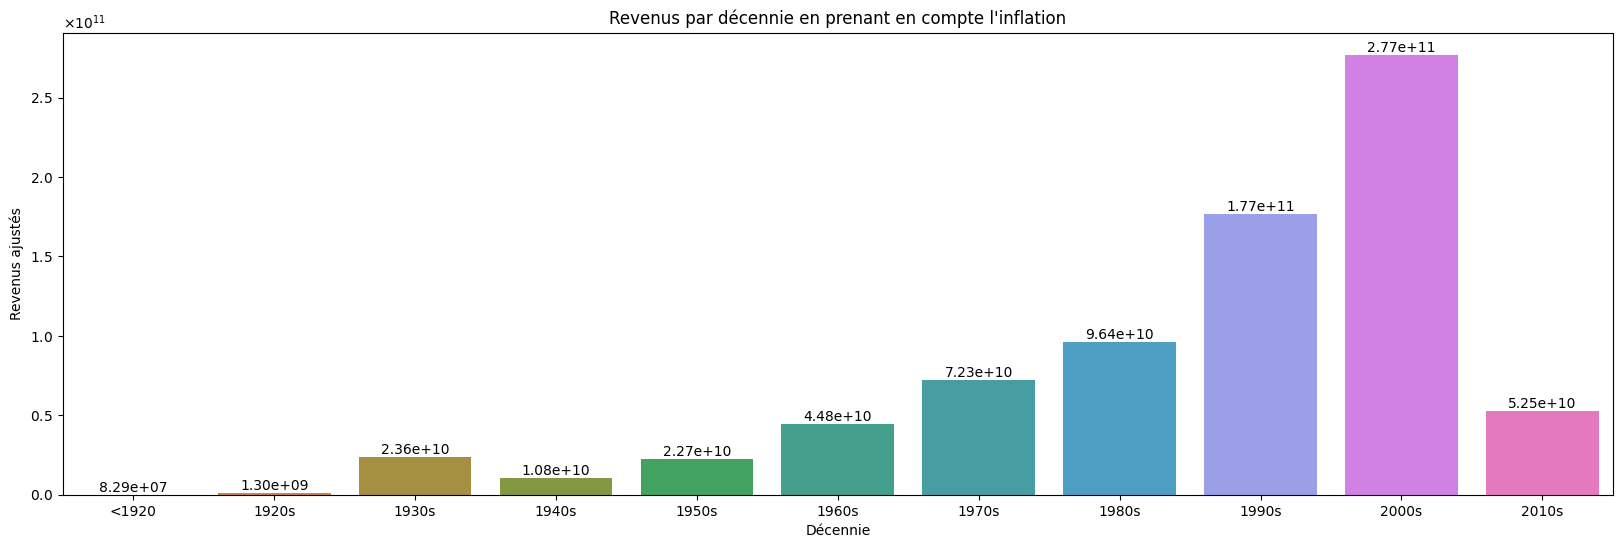

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Grouper par décennie et calculer les revenus
Revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs = sns.color_palette("husl", n_colors=len(Revenues_by_decade_inflation))

# Convertir en DataFrame
Revenues_by_decade_inflation_df = pd.DataFrame(Revenues_by_decade_inflation)

# Créer un barplot avec seaborn
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Decade', y='revenue_adjusted', data=Revenues_by_decade_inflation_df, palette=palette_couleurs)

# Ajouter des titres et des labels
plt.title('Revenus par décennie en prenant en compte l\'inflation')
plt.xlabel('Décennie')
plt.ylabel('Revenus ajustés')

# Utiliser l'écriture scientifique pour l'axe y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

# Ajouter les labels sur les barres en écriture scientifique
for i in ax.containers:
    ax.bar_label(i, fmt='%.2e', label_type='edge')  # fmt='%.2e' pour l'écriture scientifique avec deux décimales

# Afficher le graphique
plt.show()


C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1131334858.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Mean_revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].mean().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\1131334858.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Decade', y='revenue_adjusted', data=Mean_revenues_by_decade_inflation_df, palette=palette_couleurs)


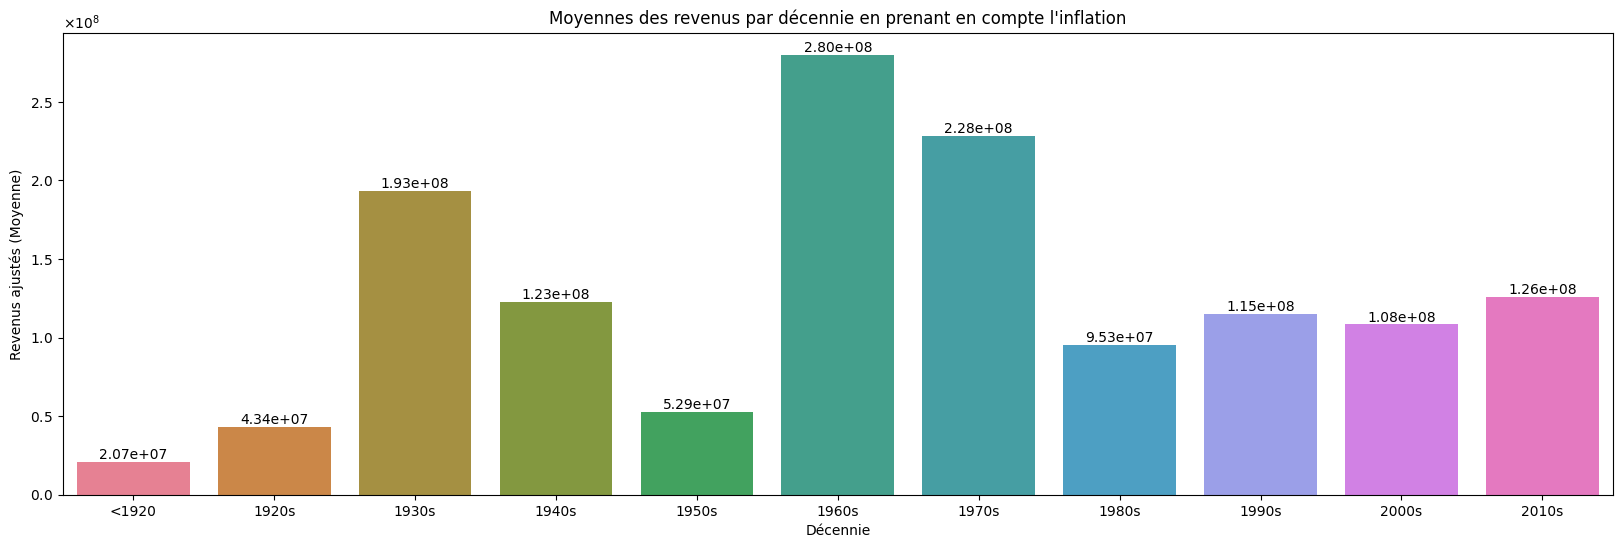

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Grouper par décennie et calculer les moyennes des revenus
Mean_revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].mean().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs = sns.color_palette("husl", n_colors=len(Mean_revenues_by_decade_inflation))

# Convertir en DataFrame
Mean_revenues_by_decade_inflation_df = pd.DataFrame(Mean_revenues_by_decade_inflation)

# Créer un barplot avec seaborn
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Decade', y='revenue_adjusted', data=Mean_revenues_by_decade_inflation_df, palette=palette_couleurs)

# Ajouter des titres et des labels
plt.title('Moyennes des revenus par décennie en prenant en compte l\'inflation')
plt.xlabel('Décennie')
plt.ylabel('Revenus ajustés (Moyenne)')

# Utiliser l'écriture scientifique pour l'axe y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

# Ajouter les labels sur les barres en écriture scientifique
for i in ax.containers:
    ax.bar_label(i, fmt='%.2e', label_type='edge')  # fmt='%.2e' pour l'écriture scientifique avec deux décimales

# Afficher le graphique
plt.show()


C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\4085620970.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\4085620970.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].sum().reset_index()
C:\Users\bigge\AppData\Local\Temp\ipykernel_16656\4085620970.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

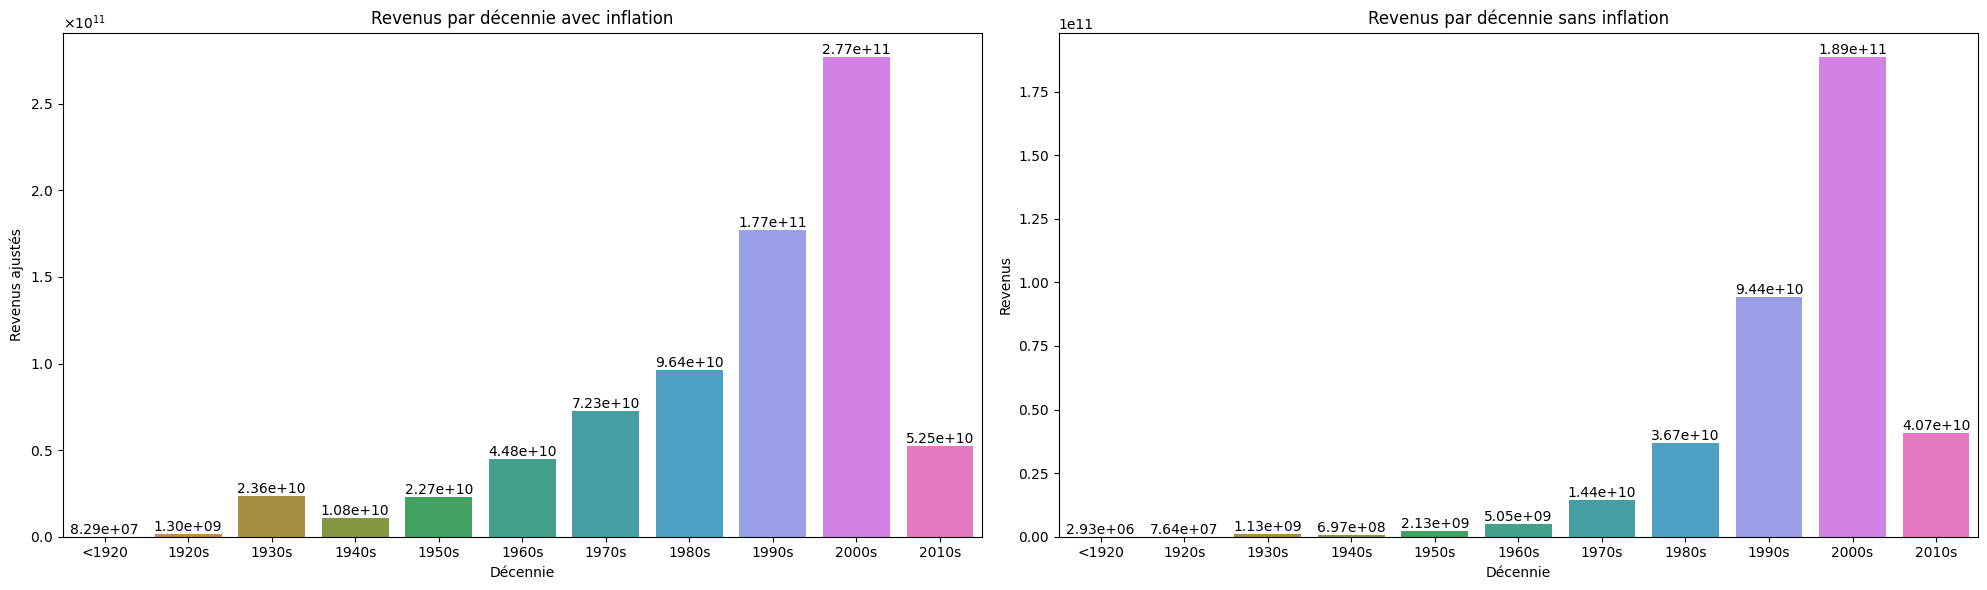

In [415]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Grouper par décennie et calculer les revenus (avec inflation)
Revenues_by_decade_inflation = result_cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs_inflation = sns.color_palette("husl", n_colors=len(Revenues_by_decade_inflation))

# Convertir en DataFrame
Revenues_by_decade_inflation_df = pd.DataFrame(Revenues_by_decade_inflation)

# Grouper par décennie et calculer les revenus (sans inflation)
Revenues_by_decade = result_cleaned_movie_data_year_revenus.groupby('Decade')['Revenue'].sum().reset_index()

# Choisir une palette de couleurs pour les décennies
palette_couleurs = sns.color_palette("husl", n_colors=len(Revenues_by_decade))

# Convertir en DataFrame
Revenues_by_decade_df = pd.DataFrame(Revenues_by_decade)

# Créer une figure et des axes en utilisant subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Premier graphique (avec inflation)
ax1 = sns.barplot(x='Decade', y='revenue_adjusted', data=Revenues_by_decade_inflation_df, palette=palette_couleurs_inflation, ax=axes[0])
ax1.set_title('Revenus par décennie avec inflation')
ax1.set_xlabel('Décennie')
ax1.set_ylabel('Revenus ajustés')
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

# Ajouter les labels sur les barres en écriture scientifique
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2e', label_type='edge')

# Deuxième graphique (sans inflation)
ax2 = sns.barplot(x='Decade', y='Revenue', data=Revenues_by_decade_df, palette=palette_couleurs, ax=axes[1])
ax2.set_title('Revenus par décennie sans inflation')
ax2.set_xlabel('Décennie')
ax2.set_ylabel('Revenus')
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2e', label_type='edge')
# Afficher la figure
plt.tight_layout()
plt.show()


# <center> Regarder les revenues ajustés avec le taux d'inflation par décennie 

In [294]:
# Analyser les revenus par genre et par décennie
result_cleaned_movie_data_year_genres




,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,year,Decade
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Thriller,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Science Fiction,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Horror,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Adventure,2001,2000s
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Supernatural,2001,2000s
...,...,...,...,...,...,...,...,...,...,...,...
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Adventure,1992,1990s
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Animation,1992,1990s
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Short Film,1992,1990s
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Anime,1992,1990s


# <center> FINI <center> 

In [ ]:
#Counts the numbers of appearance of each genre in all movies
exploded_genres = result_cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()

In [ ]:
character_data_ft_Genres = pd.merge(RAW.character_data, RAW.movie_data[['Wiki ID', 'Genres']], on='Wiki ID', how='left')

character_data_ft_Genres

,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID,Genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,NaN
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,NaN


In [ ]:
# Compter le nombre de valeurs NaN ou None par colonne
nan_count = character_data_ft_Genres.isna().sum()

# Afficher le résultat
print("Nombre de valeurs NaN ou None par colonne :")
print(nan_count)

character_data_ft_Genres = character_data_ft_Genres.dropna(subset=['Genres'])




# Compter le nombre de valeurs NaN ou None par colonne
nan_count = character_data_ft_Genres.isna().sum()
# Afficher le résultat
print("Nombre de valeurs NaN ou None par colonne :")
print(nan_count)


Nombre de valeurs NaN ou None par colonne :
Wiki ID                      0
Freebase ID                  0
Release date              9995
Character name          257875
Actor DOB               106145
Actor gender             45609
Actor height            295845
Actor ethnicity         344611
Actor name                1228
Actor age at release    158113
Map ID                       0
Character ID            257865
Actor ID                   815
Genres                  176797
dtype: int64
Nombre de valeurs NaN ou None par colonne :
Wiki ID                      0
Freebase ID                  0
Release date                 0
Character name          126395
Actor DOB                60459
Actor gender             20538
Actor height            171764
Actor ethnicity         206754
Actor name                 691
Actor age at release     82410
Map ID                       0
Character ID            126385
Actor ID                   509
Genres                       0
dtype: int64


In [ ]:
error_count = 0

def extract_genres(genre_str):
    global error_count  # Définir la variable error_count comme globale
    
    try:
        genre_dict = ast.literal_eval(genre_str)
        return list(genre_dict.values())
    except (ValueError, SyntaxError) as e:
        print(f"Error converting string to dictionary. Error: {e}")
        error_count += 1
        return []

    
    

In [ ]:
Cleaned_genres = character_data_ft_Genres['Genres'].apply(extract_genres)
print(error_count)

0


In [ ]:
Cleaned_genres

#character_data_ft_Genres["Genres"] = Cleaned_genres

#character_data_ft_Genres



0         [Thriller, Science Fiction, Horror, Adventure,...
1         [Thriller, Science Fiction, Horror, Adventure,...
2         [Thriller, Science Fiction, Horror, Adventure,...
3         [Thriller, Science Fiction, Horror, Adventure,...
4         [Thriller, Science Fiction, Horror, Adventure,...
                                ...                        
450661    [Science Fiction, Japanese Movies, Adventure, ...
450662    [Science Fiction, Japanese Movies, Adventure, ...
450663    [Science Fiction, Japanese Movies, Adventure, ...
450664    [Science Fiction, Japanese Movies, Adventure, ...
450665    [Science Fiction, Japanese Movies, Adventure, ...
Name: Genres, Length: 273872, dtype: object

In [ ]:
exploded_genres = character_data_ft_Genres.explode('Genres').drop_duplicates(subset=['Wiki ID', 'Genres'])
genre_counts = exploded_genres['Genres'].value_counts()

genre_counts

Genres
{"/m/07s9rl0": "Drama"}                                                                                                                                                                                                                  2342
{"/m/01z4y": "Comedy"}                                                                                                                                                                                                                    763
{"/m/02hmvc": "Short Film", "/m/06ppq": "Silent film", "/m/0219x_": "Indie", "/m/01g6gs": "Black-and-white", "/m/01z4y": "Comedy"}                                                                                                        489
{}                                                                                                                                                                                                                                        407
{"/m/05p553": "Comedy film"}             

In [ ]:
# Set your threshold value
threshold = 1000  # Example threshold, adjust as needed

# Filter out genres below the threshold
filtered_genres = genre_counts[genre_counts >= threshold].index.tolist()

# Filter the original DataFrame based on the threshold
Filtered_genres = character_data_ft_Genres.apply(lambda row: [genre for genre in row['Genres'] if genre in filtered_genres], axis=1)

Filtered_genres

0         []
1         []
2         []
3         []
4         []
          ..
450661    []
450662    []
450663    []
450664    []
450665    []
Length: 273872, dtype: object

In [ ]:
character_data_ft_Genres["Genres"] = Filtered_genres

C:\Users\bigge\AppData\Local\Temp\ipykernel_14900\3869421011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_data_ft_Genres["Genres"] = Filtered_genres


In [ ]:
exploded_genres = character_data_ft_Genres['Genres'].explode()
genre_counts = exploded_genres.value_counts()

In [ ]:
genre_counts

Series([], Name: count, dtype: int64)

# Analyse des données de films

Dans cette section, je vais créer un DataFrame à partir de mes données et supprimer tous les films où nous n'avons pas d'informations sur les revenus.




In [ ]:
movie_data = RAW.movie_data

movie_data

data_clean = movie_data.dropna(subset=['Revenue'], inplace=False) #On supprime tous les films où on a pas les infos sur les revenues

#Afin de pouvoir comparer les revenues, on va essayer de réaliser une fonction qui ajuste les revenues en fonction de l'inflation
#On trouve d'abord la date la plus ancienne et la date la plus récente de nos films
# Trouver la date la plus ancienne et la plus récente
date_plus_ancienne = data_clean['Release date'].min()
date_plus_recente = data_clean['Release date'].max()

print("Date la plus ancienne:", date_plus_ancienne)
print("Date la plus récente:", date_plus_recente)

#Date la plus ancienne: 1897-05-22 00:00:00
#Date la plus récente: 2012-10-25 00:00:00





Date la plus ancienne: 1897-05-22 00:00:00
Date la plus récente: 2012-10-25 00:00:00


# Verifier les NaNs et mettre au bon format

Ici, j'importe les données du CPI pour avoir les indices de l'inflation aux Etats-Unis, je crée une copie de mon dataframe "Clean_data" que je nomme clean_data_2

Ensuite je convertis dans le bon format les date de sortie des films 

Je compte les valeurs "NaN" de Clean_data dans la colonne date de sortie après conversion pour être sûr qu'aucune erreur n'a eu lieu

Je m'assure aussi que les valeurs des Revenus soient également dans le bon format numérique 

Je crée une copie de Clean_Data_2 que je nomme Clean_Data_3

In [ ]:

import cpi 


# Convertir la colonne "release_date" en format de date
# Copier le DataFrame
clean_data_2 = data_clean.copy()

# Convertir la colonne "release_date" en format de date dans le nouveau DataFrame
clean_data_2['Release date'] = pd.to_datetime(clean_data_2['Release date'], errors='coerce')

# Faire d'autres modifications à clean_data_2 selon vos besoins
# ...

# Afficher les premières lignes de clean_data_2
clean_data_2

# Compter le nombre de valeurs NaN dans la colonne "release_date"
nombre_nan = clean_data_2['Release date'].isna().sum()

# Afficher le nombre de valeurs NaN
print("Nombre de valeurs NaN dans la colonne 'release_date':", nombre_nan)

#Nombre de valeurs NaN dans la colonne 'release_date': 0
#On peut continuer 

# Assurez-vous que votre colonne de revenus est numérique
clean_data_2['Revenue'] = pd.to_numeric(clean_data_2['Revenue'], errors='coerce')

clean_data_2





clean_data_3 = clean_data_2.copy() #Je refais une copie avant de merge avec le CPI 


# Fusionner les données du dataset avec les données de l'IPC sur l'année
#clean_data_3 = pd.merge_asof(clean_data_3.sort_values('Release date'), cpi_data, left_on='Release date', right_on='date', direction='forward')




Nombre de valeurs NaN dans la colonne 'release_date': 0


# Ajout de la colonne de revenus ajustés via la bibliothèque CPI

- Je filtre les dates et je ne prends que les films sortis après 1913 car le CPI ne va pas avant 

- J'applique ensuite une fonction 

In [ ]:
import cpi


#On ne va prendre que les données après 1913

clean_data_filtered = clean_data_3[clean_data_3['Release date'].dt.year >= 1913]

# Ajouter une nouvelle colonne "revenue_adjusted" avec les revenus ajustés en fonction de l'inflation
clean_data_filtered.loc[:, 'revenue_adjusted'] = clean_data_filtered.apply(lambda x: cpi.inflate(x['Revenue'], x['Release date'].year), axis=1)

clean_data_filtered




C:\Users\bigge\AppData\Local\Temp\ipykernel_14900\1151932475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_filtered.loc[:, 'revenue_adjusted'] = clean_data_filtered.apply(lambda x: cpi.inflate(x['Revenue'], x['Release date'].year), axis=1)


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,revenue_adjusted
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.315268e+07
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",7.472043e+07
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",2.398142e+07
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",9.655040e+08
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",3.780449e+04
...,...,...,...,...,...,...,...,...,...,...
81677,6740261,/m/0glmbl,Eternally Yours,1939-10-07,683131.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02h8pkk"": ""Family Drama"", ""/m/01g6gs"": ""B...",1.438286e+07
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",7.143263e+08
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",1.180217e+07
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",4.635133e+07


# Réunir les revenus par année

- Avec la création de "clean_data_year"

- On a un dataframe avec la release date et aussi l'année

In [ ]:
import matplotlib.pyplot as plt

# Supposons que votre DataFrame soit nommé clean_data_filtered
# Assurez-vous d'ajuster le nom du DataFrame si nécessaire


clean_data_year = clean_data_filtered.copy()

# Convertir la colonne 'release_date' en datetime si ce n'est pas déjà fait
clean_data_year['Release date'] = pd.to_datetime(clean_data_year['Release date'], errors='coerce')

# Extraire l'année de la colonne 'release_date'
clean_data_year['year'] = clean_data_year['Release date'].dt.year

clean_data_year


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,revenue_adjusted,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.315268e+07,2001
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",7.472043e+07,1938
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",2.398142e+07,1989
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",9.655040e+08,1964
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",3.780449e+04,1999
...,...,...,...,...,...,...,...,...,...,...,...
81677,6740261,/m/0glmbl,Eternally Yours,1939-10-07,683131.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02h8pkk"": ""Family Drama"", ""/m/01g6gs"": ""B...",1.438286e+07,1939
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",7.143263e+08,1988
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",1.180217e+07,2000
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",4.635133e+07,1993


In [ ]:
# Créer un nouveau DataFrame avec les statistiques par année
summary_by_year = clean_data_year.groupby('year')['Revenue'].agg(['count', 'mean', 'median', 'std', 'max', 'min']).reset_index()

# Renommer les colonnes
summary_by_year.columns = ['Year', 'Number_of_Films', 'Mean_Revenue', 'Median_Revenue', 'Std_Revenue', 'Max_Revenue', 'Min_Revenue']

summary_by_year

# Créer un nouveau DataFrame avec les statistiques par année
summary_by_year_readjusted = clean_data_year.groupby('year')['revenue_adjusted'].agg(['count', 'mean', 'median', 'std', 'max', 'min']).reset_index()

# Renommer les colonnes
summary_by_year_readjusted.columns = ['Year', 'Number_of_Films', 'Mean_Revenue', 'Median_Revenue', 'Std_Revenue', 'Max_Revenue', 'Min_Revenue']

summary_by_year_readjusted


,Year,Number_of_Films,Mean_Revenue,Median_Revenue,Std_Revenue,Max_Revenue,Min_Revenue
0,1914,4,2.071798e+07,1.821338e+07,1.935938e+07,4.389825e+07,2.546918e+06
1,1921,1,7.357249e+07,7.357249e+07,NaN,7.357249e+07,7.357249e+07
2,1922,1,3.053885e+08,3.053885e+08,NaN,3.053885e+08,3.053885e+08
3,1924,2,1.835512e+07,1.835512e+07,1.155708e+07,2.652721e+07,1.018302e+07
4,1925,4,6.694274e+07,3.846323e+07,7.628325e+07,1.795731e+08,1.127140e+07
...,...,...,...,...,...,...,...
86,2008,310,9.659827e+07,2.720089e+07,1.786432e+08,1.365467e+09,1.612638e+04
87,2009,313,1.061942e+08,2.158304e+07,2.831796e+08,3.795367e+09,1.843477e+04
88,2010,294,1.034952e+08,2.054298e+07,2.112652e+08,1.426893e+09,1.342109e+04
89,2011,298,1.045109e+08,2.130781e+07,2.136293e+08,1.727928e+09,1.462111e+04


# On crée un tableau avec Année Revenues et Revenues Ajustés

In [ ]:
# Créer un nouveau DataFrame avec la moyenne des revenus et des revenus ajustés par année
average_by_year = clean_data_year.groupby('year')[['Revenue', 'revenue_adjusted']].mean().reset_index()


# Renommer les colonnes
average_by_year.columns = ['Year', 'MeanRevenue', 'MeanRevenueAdjusted']

# Renommer les colonnes
average_by_year.columns = ['Year', 'MeanRevenue', 'MeanRevenueAdjusted']

# Afficher le nouveau DataFrame
average_by_year[(average_by_year['Year'] >= 1930) & (average_by_year['Year'] <= 1940)]



,Year,MeanRevenue,MeanRevenueAdjusted
8,1930,6.764260e+05,1.185386e+07
9,1931,6.505714e+05,1.252585e+07
10,1932,1.046250e+06,2.234966e+07
11,1933,1.501510e+06,3.380187e+07
12,1934,8.740000e+05,1.908809e+07
13,1935,9.691245e+05,2.070213e+07
14,1936,1.513085e+06,3.185696e+07
15,1937,3.087482e+07,6.274771e+08
16,1938,1.224091e+06,2.540684e+07
17,1939,2.256189e+07,4.750251e+08


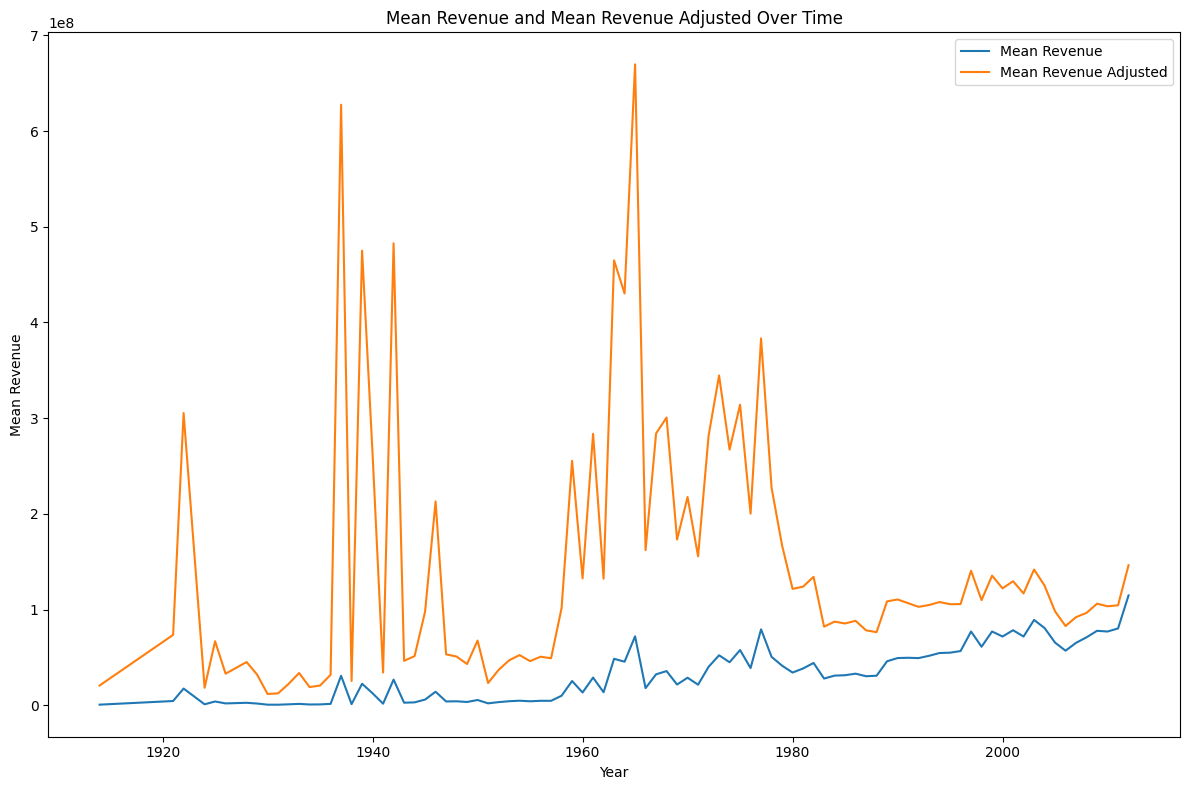

In [ ]:
import matplotlib.pyplot as plt

# Supposons que votre DataFrame soit nommé average_by_year
# Assurez-vous d'ajuster le nom du DataFrame si nécessaire

# Plot
plt.figure(figsize=(12, 8))

plt.plot(average_by_year['Year'], average_by_year['MeanRevenue'], label='Mean Revenue')
plt.plot(average_by_year['Year'], average_by_year['MeanRevenueAdjusted'], label='Mean Revenue Adjusted')

# Ajouter des étiquettes et un titre
plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue and Mean Revenue Adjusted Over Time')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
# Supposons que vos DataFrames sont nommés df_movies et df_actors_characters
# Assurez-vous d'ajuster les noms des colonnes si nécessaire

# Étape 1 : Fusionner les deux DataFrames
merged_data = pd.merge(clean_data_filtered, character_data_ft_Genres, on='Wiki ID', how='inner')

merged_data

,Wiki ID,Freebase ID_x,Movie name,Release date_x,Revenue,Runtime,Languages,Countries,Genres_x,revenue_adjusted,...,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID,Genres_y
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.315268e+07,...,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,[]
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.315268e+07,...,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,[]
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.315268e+07,...,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,[]
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.315268e+07,...,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,[]
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.315268e+07,...,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86722,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",4.635133e+07,...,1956-08-28,M,1.710,/m/0gkxl2,Luis Guzmán,36.0,/m/0cgb0nt,NaN,/m/031f1q,[]
86723,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",4.635133e+07,...,1920-09-18,M,1.790,NaN,Jack Warden,72.0,/m/0cg3s58,NaN,/m/02wr6r,[]
86724,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",4.635133e+07,...,1935-09-24,M,NaN,/m/044038p,Sean McCann,57.0,/m/0cg1r2m,NaN,/m/06w_1w,[]
86725,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",4.635133e+07,...,1959-03-08,F,NaN,NaN,Barbara Eve Harris,34.0,/m/0gccw65,NaN,/m/0gsvr7,[]


In [ ]:
# Étape 2 : Grouper par acteur et calculer la moyenne des revenus
average_revenue_by_actor = merged_data.groupby('Actor name')['revenue_adjusted'].mean()


print(average_revenue_by_actor.idxmax())
print(average_revenue_by_actor.max())

print(average_revenue_by_actor.idxmin())
print(average_revenue_by_actor.min())


Eddie Collins
8454477777.777777
Jesse Jackson
13421.093664012911


In [ ]:
# Étape 1 : Fusionner les deux DataFrames
merged_data2 = pd.merge(clean_data_filtered, character_data_ft_Genres, on='Wiki ID', how='inner')

# Étape 2 : Grouper par acteur et compter le nombre de films
film_count_by_actor = merged_data2['Actor name'].value_counts()

# Afficher les résultats
print(film_count_by_actor)

print("")
print("Nombre total d'acteurs")
print(len(film_count_by_actor))
print("")
# Filtrer les acteurs ayant joué dans 6 films ou moins
actors_with_six_or_fewer_films = film_count_by_actor[film_count_by_actor > 6]

actors_with_six_or_fewer_films

print("Acteurs ayant joué dans plus de 6 films")
print(len(actors_with_six_or_fewer_films))

Actor name
Samuel L. Jackson    65
Frank Welker         60
Robert De Niro       58
Bruce Willis         58
Nicolas Cage         56
                     ..
Irina Ninova          1
Vincent Moscato       1
Michèle Garcia        1
Armelle Deutsch       1
Sinan Albayrak        1
Name: count, Length: 33432, dtype: int64

Nombre total d'acteurs
33432

Acteurs ayant joué dans plus de 6 films
2740


In [ ]:
# Convertir les séries en DataFrames
average_revenue_df = average_revenue_by_actor.reset_index()
film_count_df = film_count_by_actor.reset_index()

# Fusionner les DataFrames sur la colonne 'Actor Name'
merged_actor_data = pd.merge(average_revenue_df, film_count_df, on='Actor name', how='outer')

merged_actor_data

,Actor name,revenue_adjusted,count
0,'Squeeks' the Caterpillar,2.043015e+08,1
1,40 Glocc,6.263550e+06,1
2,50 Cent,5.139602e+07,5
3,A Martinez,2.803599e+06,1
4,A. Delon Ellis Jr.,7.287851e+07,1
...,...,...,...
33427,Þrúður Vilhjálmsdóttir,2.148244e+05,1
33428,İdil Fırat,3.727247e+06,1
33429,Şafak Sezer,7.141871e+06,6
33430,Željko Ivanek,1.347341e+08,17


In [ ]:
# Filtrer les acteurs avec un revenu moyen supérieur à 10,000,000 et plus de 6 films
filtered_actors = merged_actor_data[(merged_actor_data['revenue_adjusted'] > 100000000) & (merged_actor_data['count'] > 10)]

filtered_actors.sort_values(by='count', ascending=False)

len(filtered_actors)


1066